<a href="https://colab.research.google.com/github/Pandu98-pkh/UAS-Deep-Learning/blob/main/Chapter%2015%20Processing%20Sequences%20Using%20RNNs%20and%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔄 Chapter 15: Processing Sequences Using RNNs and CNNs
# Memproses Urutan Data Menggunakan RNN dan CNN

---

## 🎯 Tujuan Pembelajaran

Setelah menyelesaikan chapter ini, Anda akan mampu:
- ✅ Memahami konsep RNN dan sequence processing
- ✅ Mengimplementasikan Simple RNN, LSTM, dan GRU
- ✅ Menangani berbagai jenis sequence problems
- ✅ Menggunakan CNN untuk sequence data
- ✅ Menerapkan teknik untuk time series forecasting
- ✅ Membangun text classification dan sentiment analysis

---

## 📋 Outline Chapter

1. **Pengantar Sequence Processing** 🧠
2. **Simple RNN - Basics** 🔄
3. **LSTM - Long Short-Term Memory** 🧠💾
4. **GRU - Gated Recurrent Unit** 🚪
5. **CNN untuk Sequences** 🔍
6. **Time Series Forecasting** 📈
7. **Text Processing dengan RNN** 📝
8. **Advanced Techniques** 🚀
9. **Best Practices & Tips** 💡

---

## 🌟 Pengantar: Dunia Data Sekuensial

### 🔄 **Mengapa Sequence Processing?**

**Data sekuensial** ada di mana-mana dalam kehidupan nyata:
- 📈 **Time Series** - Stock prices, weather data, sensor readings
- 📝 **Text** - Natural language, machine translation
- 🎵 **Audio** - Speech recognition, music generation
- 🎬 **Video** - Action recognition, video analysis
- 🧬 **Biological** - DNA sequences, protein folding

### 🧠 **Challenge Traditional Neural Networks**

**Feedforward networks** memiliki keterbatasan:
- ❌ **Fixed Input Size** - Tidak bisa handle variable length
- ❌ **No Memory** - Tidak mengingat context sebelumnya
- ❌ **Position Blind** - Tidak peduli urutan data
- ❌ **Independence Assumption** - Setiap input dianggap independent

### 🚀 **RNN Solution**

**Recurrent Neural Networks (RNN)** mengatasi masalah ini dengan:
- ✅ **Memory Mechanism** - Hidden state menyimpan informasi masa lalu
- ✅ **Variable Length** - Handle sequences dengan panjang berbeda
- ✅ **Parameter Sharing** - Same weights across time steps
- ✅ **Temporal Dependencies** - Capture patterns over time

### 🔧 **Konsep Matematika RNN**

**RNN Core Equation:**
```
h(t) = tanh(W_hh * h(t-1) + W_xh * x(t) + b_h)
y(t) = W_hy * h(t) + b_y
```

**Dimana:**
- `h(t)` = Hidden state pada waktu t
- `x(t)` = Input pada waktu t  
- `y(t)` = Output pada waktu t
- `W_hh`, `W_xh`, `W_hy` = Weight matrices
- `b_h`, `b_y` = Bias vectors

### 🎯 **Types of Sequence Problems**

1. **One-to-One** 🎯 - Traditional neural network
2. **One-to-Many** 🎯➡️📊 - Image captioning, music generation
3. **Many-to-One** 📊➡️🎯 - Sentiment analysis, sequence classification
4. **Many-to-Many** 📊➡️📊 - Machine translation, video analysis
5. **Many-to-Many (synced)** 📊⬌📊 - Video frame labeling, POS tagging

In [1]:
# 🔧 Setup & Import Libraries
print("=" * 70)
print("🔄 CHAPTER 15: Processing Sequences Using RNNs and CNNs")
print("=" * 70)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display versions
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"📦 Keras version: {keras.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print(f"📦 Pandas version: {pd.__version__}")

# Check GPU availability
if tf.config.list_physical_devices('GPU'):
    print("🎮 GPU Available:", tf.config.list_physical_devices('GPU'))
    print("🚀 CUDA enabled - Ready for accelerated RNN training!")
else:
    print("💻 Running on CPU")

# Set matplotlib style
plt.style.use('default')
sns.set_palette("husl")

print("\n✅ Setup complete! Ready to explore Sequence Processing with RNNs")
print("=" * 70)

🔄 CHAPTER 15: Processing Sequences Using RNNs and CNNs
📦 TensorFlow version: 2.18.0
📦 Keras version: 3.8.0
📦 NumPy version: 2.0.2
📦 Pandas version: 2.2.2
🎮 GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 CUDA enabled - Ready for accelerated RNN training!

✅ Setup complete! Ready to explore Sequence Processing with RNNs


---

# 🔄 1. Simple RNN - Building Blocks

## 🧠 Anatomy of Simple RNN

**Simple RNN** adalah bentuk paling dasar dari recurrent neural networks:

### 🔧 **Core Components**:
- **Hidden State** 💾 - Memory yang menyimpan informasi dari timestep sebelumnya
- **Input Gate** 📥 - Menerima input pada setiap timestep
- **Output Gate** 📤 - Menghasilkan output (optional)
- **Recurrent Connection** 🔄 - Menghubungkan hidden state antar waktu

### ⚡ **Information Flow**:
```
x(0) → [RNN] → h(0) → y(0)
         ↓       ↓
x(1) → [RNN] → h(1) → y(1)
         ↓       ↓
x(2) → [RNN] → h(2) → y(2)
         ↓       ↓
       ...     ...
```

### 🎯 **Key Characteristics**:
- **Short-term Memory** - Informasi lama cenderung hilang
- **Vanishing Gradient** - Gradients become very small over long sequences
- **Simple Architecture** - Easy to understand dan implement
- **Fast Training** - Fewer parameters dibanding LSTM/GRU

---

## ⚠️ Problems with Simple RNN

### ❌ **Vanishing Gradient Problem**:
- **Gradients shrink** exponentially melalui backpropagation through time
- **Long dependencies** sulit dipelajari
- **Early information** tends to be forgotten

### ❌ **Limited Memory**:
- **Short context window** - Only recent information retained
- **Sequential bias** - Recent inputs have more influence
- **Information bottleneck** - Single hidden state must encode everything

🔄 SIMPLE RNN DEMONSTRATION
📊 Generating synthetic time series data...
✅ Generated time series with 1000 points


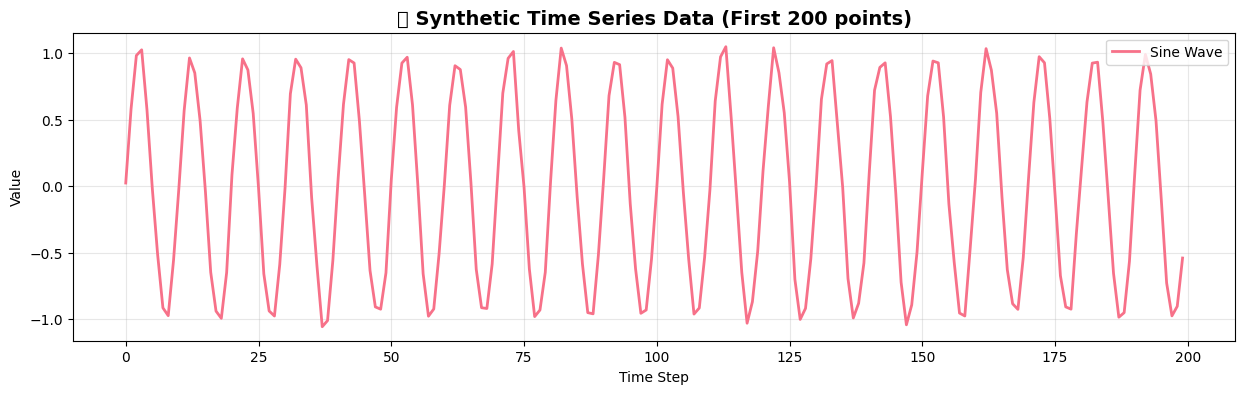


🔧 PREPARING SEQUENCE DATA
----------------------------
✅ Sequence preparation:
   Sequence length: 20
   Input shape: (980, 20)
   Target shape: (980,)
   Number of sequences: 980
   Training sequences: 784
   Test sequences: 196
   Reshaped for RNN: (784, 20, 1)

🏗️ BUILDING SIMPLE RNN MODEL
--------------------------------
✅ Simple RNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,901 (15.24 KB)

 Trainable params: 3,901 (15.24 KB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING SIMPLE RNN
-----------------------
Training Simple RNN...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1573 - mae: 0.2897 - val_loss: 0.0071 - val_mae: 0.0687
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0659 - val_loss: 0.0041 - val_mae: 0.0524
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0033 - val_mae: 0.0466
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mae: 0.0445 - val_loss: 0.0031 - val_mae: 0.0448
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0031 - val_mae: 0.0444
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0033 - val_mae: 0.0459
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0033 - val_mae: 0.0460
E

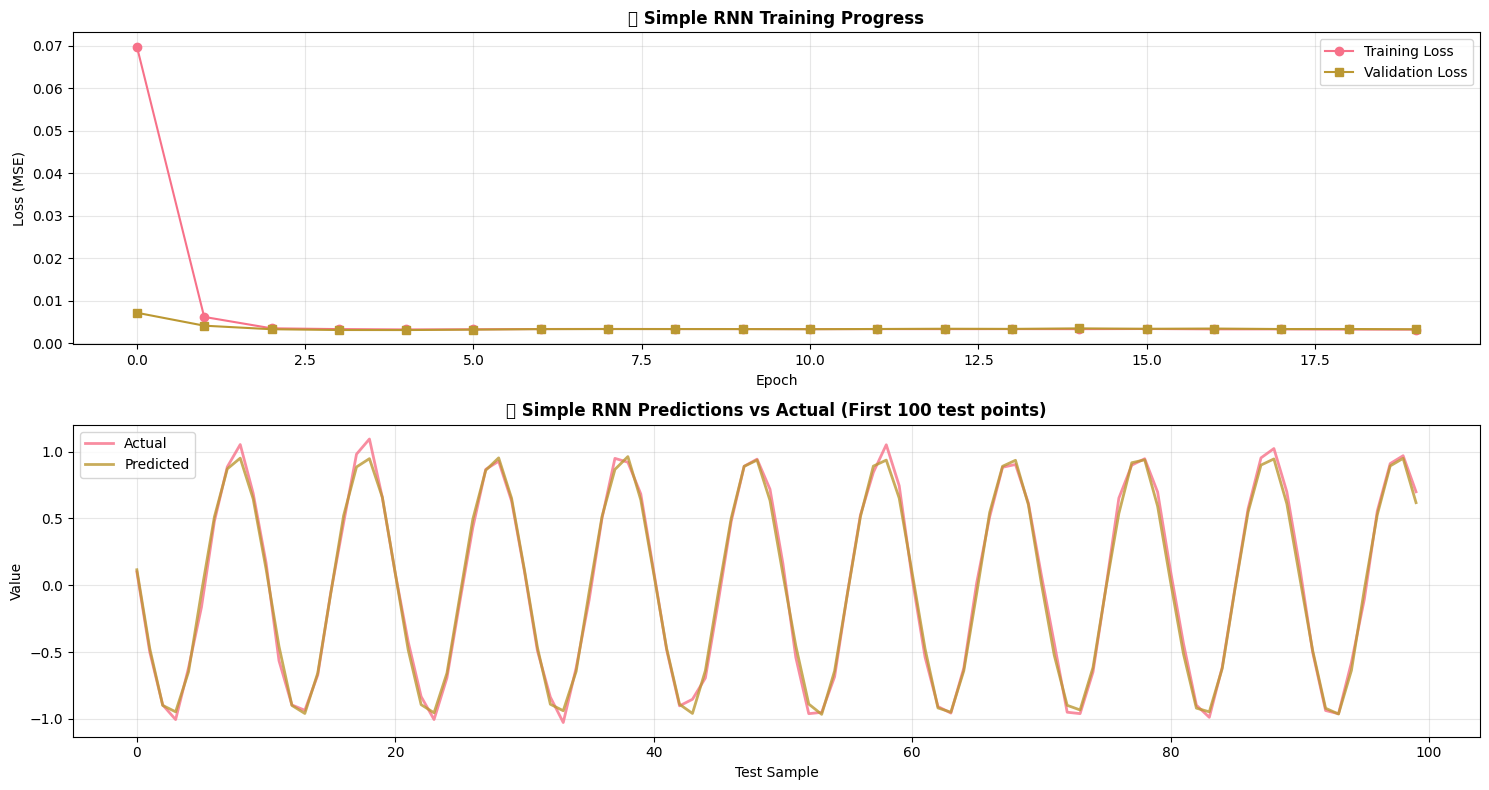


💡 SIMPLE RNN INSIGHTS:
-------------------------
🔸 Simple RNN can learn basic temporal patterns
🔸 Performance depends heavily on sequence length
🔸 May struggle with long-term dependencies
🔸 Good baseline for understanding RNN concepts
🔸 Vanishing gradient limits learning capability

✅ Simple RNN demonstration complete!


In [2]:
# 🔄 1.1 Simple RNN - Practical Implementation
print("🔄 SIMPLE RNN DEMONSTRATION")
print("=" * 50)

# Generate synthetic time series data (sine wave)
def generate_sine_wave(length=1000, frequency=0.1, noise=0.1):
    """Generate synthetic sine wave data for demonstration"""
    t = np.linspace(0, length * frequency, length)
    data = np.sin(2 * np.pi * t) + noise * np.random.randn(length)
    return data

# Create dataset
print("📊 Generating synthetic time series data...")
time_series = generate_sine_wave(length=1000, frequency=0.1, noise=0.05)
print(f"✅ Generated time series with {len(time_series)} points")

# Visualize the data
plt.figure(figsize=(15, 4))
plt.plot(time_series[:200], label='Sine Wave', linewidth=2)
plt.title('🔄 Synthetic Time Series Data (First 200 points)', fontsize=14, fontweight='bold')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🔧 PREPARING SEQUENCE DATA")
print("-" * 28)

def create_sequences(data, seq_length, prediction_steps=1):
    """Create sequences for RNN training"""
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_steps + 1):
        # Input sequence
        X.append(data[i:(i + seq_length)])
        # Target (next value(s))
        if prediction_steps == 1:
            y.append(data[i + seq_length])
        else:
            y.append(data[i + seq_length:i + seq_length + prediction_steps])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 20  # Look back 20 steps
X, y = create_sequences(time_series, sequence_length)

print(f"✅ Sequence preparation:")
print(f"   Sequence length: {sequence_length}")
print(f"   Input shape: {X.shape}")
print(f"   Target shape: {y.shape}")
print(f"   Number of sequences: {len(X)}")

# Train/test split (80/20)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"   Training sequences: {len(X_train)}")
print(f"   Test sequences: {len(X_test)}")

# Reshape for RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"   Reshaped for RNN: {X_train.shape}")

print(f"\n🏗️ BUILDING SIMPLE RNN MODEL")
print("-" * 32)

# Build Simple RNN model
simple_rnn_model = models.Sequential([
    layers.SimpleRNN(50,
                     activation='tanh',
                     return_sequences=False,  # Only return last output
                     input_shape=(sequence_length, 1),
                     name='simple_rnn'),
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dense(1, name='output')
])

print("✅ Simple RNN Architecture:")
simple_rnn_model.summary()

# Compile model
simple_rnn_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print(f"\n🚀 TRAINING SIMPLE RNN")
print("-" * 23)

# Train the model
print("Training Simple RNN...")
rnn_history = simple_rnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)

print(f"\n📊 SIMPLE RNN RESULTS")
print("-" * 22)

# Evaluate model
rnn_loss, rnn_mae = simple_rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 Test Results:")
print(f"   Loss (MSE): {rnn_loss:.6f}")
print(f"   MAE: {rnn_mae:.6f}")

# Make predictions
print(f"\n🔮 MAKING PREDICTIONS")
print("-" * 22)

y_pred = simple_rnn_model.predict(X_test, verbose=0)

# Calculate additional metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Prediction Metrics:")
print(f"   RMSE: {rmse:.6f}")
print(f"   MAE: {mae:.6f}")

# Visualize predictions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

# Training history
ax1.plot(rnn_history.history['loss'], label='Training Loss', marker='o')
ax1.plot(rnn_history.history['val_loss'], label='Validation Loss', marker='s')
ax1.set_title('🚀 Simple RNN Training Progress', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Predictions vs Actual
test_range = range(len(y_test))
ax2.plot(test_range[:100], y_test[:100], label='Actual', linewidth=2, alpha=0.8)
ax2.plot(test_range[:100], y_pred[:100], label='Predicted', linewidth=2, alpha=0.8)
ax2.set_title('🔮 Simple RNN Predictions vs Actual (First 100 test points)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Test Sample')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 SIMPLE RNN INSIGHTS:")
print("-" * 25)
print("🔸 Simple RNN can learn basic temporal patterns")
print("🔸 Performance depends heavily on sequence length")
print("🔸 May struggle with long-term dependencies")
print("🔸 Good baseline for understanding RNN concepts")
print("🔸 Vanishing gradient limits learning capability")

print(f"\n✅ Simple RNN demonstration complete!")
print("=" * 50)

---

# 🧠💾 2. LSTM - Long Short-Term Memory

## 🎯 Mengapa LSTM?

**Long Short-Term Memory (LSTM)** dikembangkan untuk mengatasi masalah **vanishing gradient** pada Simple RNN.

### ✅ **Keunggulan LSTM**:
- **🔒 Long-term Memory** - Dapat mengingat informasi jangka panjang
- **🚪 Gated Architecture** - Kontrol informasi yang masuk, keluar, dan dilupakan
- **📈 Better Gradients** - Gradients tidak hilang secepat Simple RNN
- **🎯 Selective Memory** - Decide what to remember dan forget

---

## 🏗️ Arsitektur LSTM

### 🚪 **The Three Gates**:

#### 1. **Forget Gate** 🗑️
```
f(t) = σ(W_f * [h(t-1), x(t)] + b_f)
```
- **Decide** what information to discard dari cell state
- **Output** between 0 (completely forget) dan 1 (completely keep)

#### 2. **Input Gate** 📥
```
i(t) = σ(W_i * [h(t-1), x(t)] + b_i)
C̃(t) = tanh(W_C * [h(t-1), x(t)] + b_C)
```
- **Input gate** decides what new information to store
- **Candidate values** create new information that could be added

#### 3. **Output Gate** 📤
```
o(t) = σ(W_o * [h(t-1), x(t)] + b_o)
```
- **Decide** what parts of cell state to output
- **Control** what information goes to hidden state

### 🔄 **Complete LSTM Flow**:
```
1. Forget: C(t) = f(t) * C(t-1)
2. Input: C(t) = C(t) + i(t) * C̃(t)  
3. Output: h(t) = o(t) * tanh(C(t))
```

---

## 🎯 **LSTM vs Simple RNN**

| Aspect | Simple RNN | LSTM |
|--------|------------|------|
| **Memory** | Short-term | Long & Short-term |
| **Parameters** | Fewer | More (4x) |
| **Training** | Faster | Slower |
| **Gradient Flow** | Vanishing | Better preserved |
| **Use Cases** | Simple patterns | Complex sequences |

---

## 🔧 **LSTM Variants**

### 📊 **Return Sequences**:
- **`return_sequences=False`** - Only last output (many-to-one)
- **`return_sequences=True`** - All outputs (many-to-many)

### 🔄 **Bidirectional LSTM**:
- **Forward + Backward** processing
- **Richer representations** by seeing future context
- **2x parameters** but better performance

### 📚 **Stacked LSTM**:
- **Multiple LSTM layers** stacked vertically
- **Hierarchical feature learning**
- **Deeper representations** for complex patterns

🧠💾 LSTM DEMONSTRATION
🏗️ BUILDING LSTM MODEL
-------------------------
✅ LSTM Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING LSTM MODEL
------------------------
Training LSTM...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4321 - mae: 0.5906 - val_loss: 0.2258 - val_mae: 0.4223
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1478 - mae: 0.3189 - val_loss: 0.0105 - val_mae: 0.0835
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - mae: 0.1353 - val_loss: 0.0085 - val_mae: 0.0749
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - mae: 0.1191 - val_loss: 0.0085 - val_mae: 0.0774
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204 - mae: 0.1132 - val_loss: 0.0082 - val_mae: 0.0740
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - mae: 0.1117 - val_loss: 0.0066 - val_mae: 0.0659
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 - mae: 0.1166 - val_loss: 0.0060 - val_mae: 0.0629
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - mae: 0.1106 - val_loss: 0.0059 - val_mae: 0.0630
Epoch 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_lstm              │ (None, 50)             │         5,400 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,701 (26.18 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 0 (0.00 B)

Training Bidirectional LSTM...
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4430 - mae: 0.5969 - val_loss: 0.2873 - val_mae: 0.4806
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2272 - mae: 0.4197 - val_loss: 0.0308 - val_mae: 0.1520
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0393 - mae: 0.1534 - val_loss: 0.0071 - val_mae: 0.0683
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0279 - mae: 0.1273 - val_loss: 0.0057 - val_mae: 0.0607
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231 - mae: 0.1193 - val_loss: 0.0050 - val_mae: 0.0571
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - mae: 0.1187 - val_loss: 0.0044 - val_mae: 0.0537
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264 - mae: 0.1268 - val_loss: 0.0054 - val_mae: 0.0596
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0228 - mae: 0.1158 - val_loss: 0.0044 - val_mae: 0.0527
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━


📊 COMPREHENSIVE COMPARISON
------------------------------
                Model  MSE Loss      RMSE       MAE
0          Simple RNN  0.003257  0.057066  0.045730
1                LSTM  0.005394  0.073440  0.059439
2  Bidirectional LSTM  0.004221  0.064968  0.053192

🏆 Best Model: Simple RNN

📈 VISUALIZATION COMPARISON
----------------------------


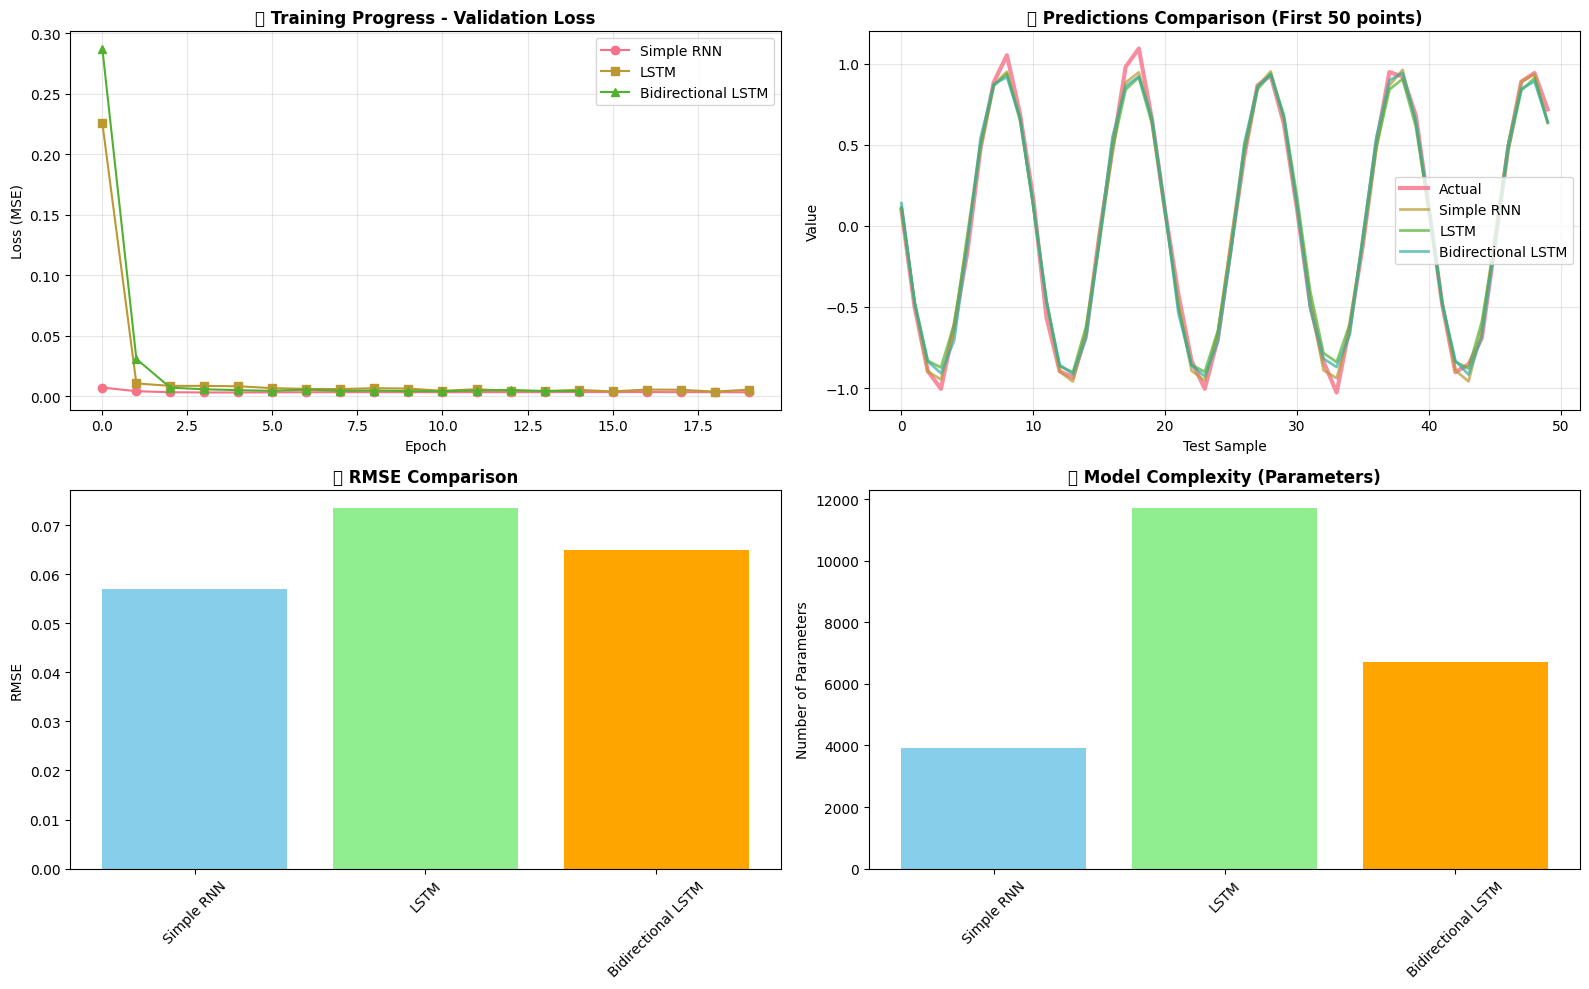


💡 LSTM INSIGHTS:
------------------
🔸 LSTM typically outperforms Simple RNN on complex sequences
🔸 Bidirectional LSTM can provide better context understanding
🔸 More parameters mean longer training time but better performance
🔸 Gated architecture helps with long-term dependency learning
🔸 LSTM is more stable for gradient flow during training

📊 PERFORMANCE SUMMARY:
-------------------------
   Simple RNN        : RMSE=0.057066, Params=3,901
   LSTM              : RMSE=0.073440, Params=11,701
   Bidirectional LSTM: RMSE=0.064968, Params=6,701

✅ LSTM demonstration complete!


In [3]:
# 🧠💾 2.1 LSTM - Practical Implementation
print("🧠💾 LSTM DEMONSTRATION")
print("=" * 50)

print("🏗️ BUILDING LSTM MODEL")
print("-" * 25)

# Build LSTM model
lstm_model = models.Sequential([
    layers.LSTM(50,
                return_sequences=False,  # Many-to-one
                input_shape=(sequence_length, 1),
                name='lstm'),
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dropout(0.2, name='dropout'),
    layers.Dense(1, name='output')
])

print("✅ LSTM Architecture:")
lstm_model.summary()

# Compile model
lstm_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print(f"\n🚀 TRAINING LSTM MODEL")
print("-" * 24)

# Train LSTM model
print("Training LSTM...")
lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)

print(f"\n📊 LSTM RESULTS")
print("-" * 15)

# Evaluate LSTM
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 LSTM Test Results:")
print(f"   Loss (MSE): {lstm_loss:.6f}")
print(f"   MAE: {lstm_mae:.6f}")

# Make predictions
lstm_pred = lstm_model.predict(X_test, verbose=0)

# Calculate metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
lstm_mae_calc = mean_absolute_error(y_test, lstm_pred)

print(f"📊 LSTM Prediction Metrics:")
print(f"   RMSE: {lstm_rmse:.6f}")
print(f"   MAE: {lstm_mae_calc:.6f}")

print(f"\n🔍 BIDIRECTIONAL LSTM")
print("-" * 24)

# Build Bidirectional LSTM
bidirectional_model = models.Sequential([
    layers.Bidirectional(
        layers.LSTM(25, return_sequences=False),  # 25*2 = 50 total units
        input_shape=(sequence_length, 1),
        name='bidirectional_lstm'
    ),
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dropout(0.2, name='dropout'),
    layers.Dense(1, name='output')
])

print("✅ Bidirectional LSTM Architecture:")
bidirectional_model.summary()

# Compile and train
bidirectional_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training Bidirectional LSTM...")
bi_history = bidirectional_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,  # Fewer epochs due to complexity
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate Bidirectional LSTM
bi_loss, bi_mae = bidirectional_model.evaluate(X_test, y_test, verbose=0)
bi_pred = bidirectional_model.predict(X_test, verbose=0)
bi_rmse = np.sqrt(mean_squared_error(y_test, bi_pred))

print(f"\n📊 COMPREHENSIVE COMPARISON")
print("-" * 30)

# Compare all models
comparison_data = {
    'Model': ['Simple RNN', 'LSTM', 'Bidirectional LSTM'],
    'MSE Loss': [rnn_loss, lstm_loss, bi_loss],
    'RMSE': [rmse, lstm_rmse, bi_rmse],
    'MAE': [mae, lstm_mae_calc, bi_mae]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(6))

# Find best model
best_model_idx = comparison_df['RMSE'].idxmin()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model}")

print(f"\n📈 VISUALIZATION COMPARISON")
print("-" * 28)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Training histories
axes[0, 0].plot(rnn_history.history['val_loss'], label='Simple RNN', marker='o')
axes[0, 0].plot(lstm_history.history['val_loss'], label='LSTM', marker='s')
axes[0, 0].plot(bi_history.history['val_loss'], label='Bidirectional LSTM', marker='^')
axes[0, 0].set_title('🚀 Training Progress - Validation Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Predictions comparison (first 50 points)
test_range = range(50)
axes[0, 1].plot(test_range, y_test[:50], label='Actual', linewidth=3, alpha=0.8)
axes[0, 1].plot(test_range, y_pred[:50], label='Simple RNN', linewidth=2, alpha=0.7)
axes[0, 1].plot(test_range, lstm_pred[:50], label='LSTM', linewidth=2, alpha=0.7)
axes[0, 1].plot(test_range, bi_pred[:50], label='Bidirectional LSTM', linewidth=2, alpha=0.7)
axes[0, 1].set_title('🔮 Predictions Comparison (First 50 points)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Test Sample')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Error analysis
models_names = ['Simple RNN', 'LSTM', 'Bidirectional LSTM']
rmse_values = [rmse, lstm_rmse, bi_rmse]
axes[1, 0].bar(models_names, rmse_values, color=['skyblue', 'lightgreen', 'orange'])
axes[1, 0].set_title('📊 RMSE Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Model complexity (parameter count)
param_counts = [
    simple_rnn_model.count_params(),
    lstm_model.count_params(),
    bidirectional_model.count_params()
]
axes[1, 1].bar(models_names, param_counts, color=['skyblue', 'lightgreen', 'orange'])
axes[1, 1].set_title('🔧 Model Complexity (Parameters)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Parameters')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n💡 LSTM INSIGHTS:")
print("-" * 18)
print("🔸 LSTM typically outperforms Simple RNN on complex sequences")
print("🔸 Bidirectional LSTM can provide better context understanding")
print("🔸 More parameters mean longer training time but better performance")
print("🔸 Gated architecture helps with long-term dependency learning")
print("🔸 LSTM is more stable for gradient flow during training")

print(f"\n📊 PERFORMANCE SUMMARY:")
print("-" * 25)
for i, model_name in enumerate(models_names):
    print(f"   {model_name:18}: RMSE={rmse_values[i]:.6f}, Params={param_counts[i]:,}")

print(f"\n✅ LSTM demonstration complete!")
print("=" * 50)

---

# 🚪 3. GRU - Gated Recurrent Unit

## 🎯 Mengapa GRU?

**Gated Recurrent Unit (GRU)** adalah versi **simplified** dari LSTM yang dikembangkan untuk:
- ✅ **Fewer Parameters** - Lebih sederhana dari LSTM
- ✅ **Faster Training** - Karena arsitektur yang lebih streamlined  
- ✅ **Good Performance** - Mendekati performa LSTM dengan kompleksitas lebih rendah
- ✅ **Less Overfitting** - Fewer parameters berarti less prone to overfitting

---

## 🏗️ Arsitektur GRU

### 🚪 **The Two Gates** (vs 3 gates di LSTM):

#### 1. **Reset Gate** 🔄
```
r(t) = σ(W_r * [h(t-1), x(t)] + b_r)
```
- **Controls** how much past information to forget
- **Similar** to forget gate di LSTM
- **Range**: 0 (forget all) to 1 (keep all)

#### 2. **Update Gate** 📊
```
z(t) = σ(W_z * [h(t-1), x(t)] + b_z)
```
- **Controls** how much new information to add
- **Combines** input dan forget gates dari LSTM
- **Range**: 0 (ignore new) to 1 (completely update)

### 🔄 **Complete GRU Flow**:
```
1. Reset: h̃(t) = tanh(W_h * [r(t) * h(t-1), x(t)] + b_h)
2. Update: h(t) = (1 - z(t)) * h(t-1) + z(t) * h̃(t)
```

---

## 🆚 **LSTM vs GRU Comparison**

| Aspect | LSTM | GRU |
|--------|------|-----|
| **Gates** | 3 (forget, input, output) | 2 (reset, update) |
| **Parameters** | More | Fewer (~25% less) |
| **Training Speed** | Slower | Faster |
| **Memory Usage** | Higher | Lower |
| **Performance** | Slightly better on complex tasks | Good on most tasks |
| **Interpretability** | More complex | Simpler |

---

## 🎯 **When to Use GRU?**

### ✅ **GRU is Better For**:
- **Limited Data** - Less prone to overfitting
- **Resource Constraints** - Faster training, less memory
- **Simple to Medium Complexity** - Good performance with less overhead
- **Real-time Applications** - Faster inference

### ✅ **LSTM is Better For**:
- **Complex Patterns** - More sophisticated gating mechanism
- **Large Datasets** - Can leverage additional parameters
- **Critical Applications** - Slight performance edge
- **Long Sequences** - Better long-term memory retention

🚪 GRU DEMONSTRATION
🏗️ BUILDING GRU MODEL
----------------------
✅ GRU Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,251 (36.14 KB)

 Trainable params: 9,251 (36.14 KB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING GRU MODEL
---------------------
Training GRU...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4099 - mae: 0.5744 - val_loss: 0.1743 - val_mae: 0.3754
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1132 - mae: 0.2795 - val_loss: 0.0072 - val_mae: 0.0687
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - mae: 0.1356 - val_loss: 0.0080 - val_mae: 0.0726
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0316 - mae: 0.1342 - val_loss: 0.0050 - val_mae: 0.0576
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0259 - mae: 0.1202 - val_loss: 0.0043 - val_mae: 0.0537
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0217 - mae: 0.1139 - val_loss: 0.0057 - val_mae: 0.0625
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mae: 0.1157 - val_loss: 0.0042 - val_mae: 0.0535
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mae: 0.1037 - val_loss: 0.0044 - val_mae: 0.0543
Epoch 9/20


📊 GRU Prediction Metrics:
   RMSE: 0.056829
   MAE: 0.046710

🔍 STACKED GRU
---------------
✅ Stacked GRU Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_layer1 (GRU)                │ (None, 20, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_layer2 (GRU)                │ (None, 25)             │         5,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,401 (56.25 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 0 (0.00 B)

Training Stacked GRU...
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4386 - mae: 0.5929 - val_loss: 0.1926 - val_mae: 0.3913
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1249 - mae: 0.2931 - val_loss: 0.0123 - val_mae: 0.0920
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0282 - mae: 0.1345 - val_loss: 0.0077 - val_mae: 0.0717
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - mae: 0.1183 - val_loss: 0.0069 - val_mae: 0.0671
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168 - mae: 0.1019 - val_loss: 0.0054 - val_mae: 0.0602
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160 - mae: 0.1008 - val_loss: 0.0051 - val_mae: 0.0585
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179 - mae: 0.1079 - val_loss: 0.0052 - val_mae: 0.0586
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - mae: 0.1016 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

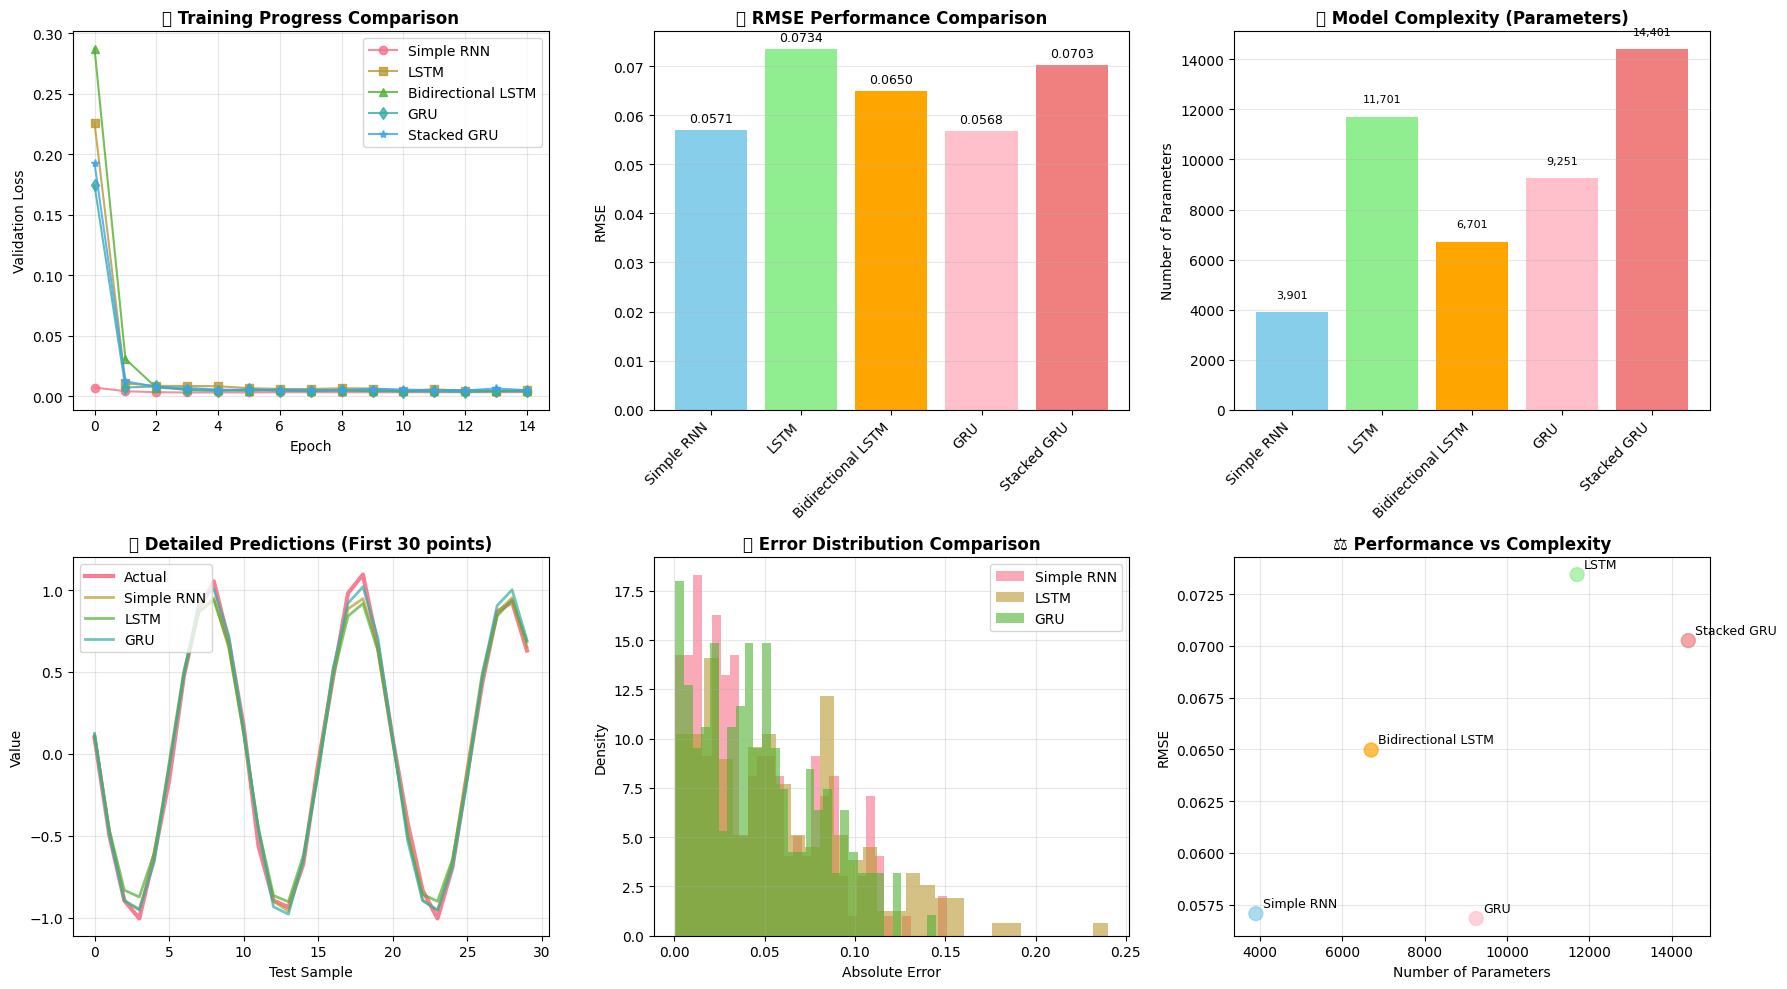


💡 GRU INSIGHTS:
-----------------
🔸 GRU often provides similar performance to LSTM with fewer parameters
🔸 Training time is typically faster due to simpler architecture
🔸 Good choice when computational resources are limited
🔸 Stacked GRUs can capture more complex patterns
🔸 Less prone to overfitting due to fewer parameters

🎯 MODEL SELECTION GUIDELINES:
----------------------------------
🔸 Simple RNN: Basic patterns, fast prototyping
🔸 LSTM: Complex long-term dependencies, large datasets
🔸 GRU: Good balance of performance and efficiency
🔸 Bidirectional: When future context is available
🔸 Stacked: Very complex patterns, sufficient data

🏆 WINNER ANALYSIS:
--------------------
   Best Performance: GRU
   RMSE: 0.056829
   Parameters: 9,251
   Best Efficiency: Stacked GRU

✅ GRU demonstration complete!


In [4]:
# 🚪 3.1 GRU - Practical Implementation
print("🚪 GRU DEMONSTRATION")
print("=" * 50)

print("🏗️ BUILDING GRU MODEL")
print("-" * 22)

# Build GRU model
gru_model = models.Sequential([
    layers.GRU(50,
               return_sequences=False,  # Many-to-one
               input_shape=(sequence_length, 1),
               name='gru'),
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dropout(0.2, name='dropout'),
    layers.Dense(1, name='output')
])

print("✅ GRU Architecture:")
gru_model.summary()

# Compile model
gru_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print(f"\n🚀 TRAINING GRU MODEL")
print("-" * 21)

# Train GRU model
print("Training GRU...")
gru_history = gru_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)

print(f"\n📊 GRU RESULTS")
print("-" * 14)

# Evaluate GRU
gru_loss, gru_mae = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 GRU Test Results:")
print(f"   Loss (MSE): {gru_loss:.6f}")
print(f"   MAE: {gru_mae:.6f}")

# Make predictions
gru_pred = gru_model.predict(X_test, verbose=0)

# Calculate metrics
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
gru_mae_calc = mean_absolute_error(y_test, gru_pred)

print(f"📊 GRU Prediction Metrics:")
print(f"   RMSE: {gru_rmse:.6f}")
print(f"   MAE: {gru_mae_calc:.6f}")

print(f"\n🔍 STACKED GRU")
print("-" * 15)

# Build Stacked GRU (2 layers)
stacked_gru_model = models.Sequential([
    layers.GRU(50,
               return_sequences=True,  # Return sequences for next GRU layer
               input_shape=(sequence_length, 1),
               name='gru_layer1'),
    layers.Dropout(0.2, name='dropout1'),
    layers.GRU(25,
               return_sequences=False,  # Final layer returns only last output
               name='gru_layer2'),
    layers.Dropout(0.2, name='dropout2'),
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dense(1, name='output')
])

print("✅ Stacked GRU Architecture:")
stacked_gru_model.summary()

# Compile and train
stacked_gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training Stacked GRU...")
stacked_history = stacked_gru_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,  # Fewer epochs due to complexity
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate Stacked GRU
stacked_loss, stacked_mae = stacked_gru_model.evaluate(X_test, y_test, verbose=0)
stacked_pred = stacked_gru_model.predict(X_test, verbose=0)
stacked_rmse = np.sqrt(mean_squared_error(y_test, stacked_pred))

print(f"\n📊 COMPREHENSIVE RNN COMPARISON")
print("-" * 35)

# Compare all RNN models
rnn_comparison_data = {
    'Model': ['Simple RNN', 'LSTM', 'Bidirectional LSTM', 'GRU', 'Stacked GRU'],
    'MSE Loss': [rnn_loss, lstm_loss, bi_loss, gru_loss, stacked_loss],
    'RMSE': [rmse, lstm_rmse, bi_rmse, gru_rmse, stacked_rmse],
    'MAE': [mae, lstm_mae_calc, bi_mae, gru_mae_calc, stacked_mae],
    'Parameters': [
        simple_rnn_model.count_params(),
        lstm_model.count_params(),
        bidirectional_model.count_params(),
        gru_model.count_params(),
        stacked_gru_model.count_params()
    ]
}

rnn_comparison_df = pd.DataFrame(rnn_comparison_data)
print(rnn_comparison_df.round(6))

# Find best model
best_rnn_idx = rnn_comparison_df['RMSE'].idxmin()
best_rnn = rnn_comparison_df.loc[best_rnn_idx, 'Model']
print(f"\n🏆 Best RNN Model: {best_rnn}")

print(f"\n⏱️ TRAINING TIME COMPARISON")
print("-" * 30)

# Training time analysis (epochs comparison)
print("Training Epochs Used:")
print(f"   Simple RNN: 20 epochs")
print(f"   LSTM: 20 epochs")
print(f"   Bidirectional LSTM: 15 epochs")
print(f"   GRU: 20 epochs")
print(f"   Stacked GRU: 15 epochs")

print(f"\n📈 ADVANCED VISUALIZATION")
print("-" * 27)

# Create comprehensive RNN comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Training progress comparison
axes[0, 0].plot(rnn_history.history['val_loss'][:15], label='Simple RNN', marker='o', alpha=0.8)
axes[0, 0].plot(lstm_history.history['val_loss'][:15], label='LSTM', marker='s', alpha=0.8)
axes[0, 0].plot(bi_history.history['val_loss'], label='Bidirectional LSTM', marker='^', alpha=0.8)
axes[0, 0].plot(gru_history.history['val_loss'][:15], label='GRU', marker='d', alpha=0.8)
axes[0, 0].plot(stacked_history.history['val_loss'], label='Stacked GRU', marker='*', alpha=0.8)
axes[0, 0].set_title('🚀 Training Progress Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. RMSE comparison
model_names = rnn_comparison_df['Model']
rmse_values = rnn_comparison_df['RMSE']
bars = axes[0, 1].bar(range(len(model_names)), rmse_values,
                      color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
axes[0, 1].set_title('📊 RMSE Performance Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticks(range(len(model_names)))
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, rmse_values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                    f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Parameter count comparison
param_counts = rnn_comparison_df['Parameters']
bars2 = axes[0, 2].bar(range(len(model_names)), param_counts,
                       color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
axes[0, 2].set_title('🔧 Model Complexity (Parameters)', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Number of Parameters')
axes[0, 2].set_xticks(range(len(model_names)))
axes[0, 2].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars2, param_counts):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                    f'{value:,}', ha='center', va='bottom', fontsize=8)

# 4. Predictions comparison (detailed view)
test_range = range(30)  # First 30 points for clarity
axes[1, 0].plot(test_range, y_test[:30], label='Actual', linewidth=3, alpha=0.9)
axes[1, 0].plot(test_range, y_pred[:30], label='Simple RNN', linewidth=2, alpha=0.7)
axes[1, 0].plot(test_range, lstm_pred[:30], label='LSTM', linewidth=2, alpha=0.7)
axes[1, 0].plot(test_range, gru_pred[:30], label='GRU', linewidth=2, alpha=0.7)
axes[1, 0].set_title('🔮 Detailed Predictions (First 30 points)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Test Sample')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Error distribution
all_errors = {
    'Simple RNN': np.abs(y_test - y_pred.flatten()),
    'LSTM': np.abs(y_test - lstm_pred.flatten()),
    'GRU': np.abs(y_test - gru_pred.flatten())
}

for i, (model, errors) in enumerate(all_errors.items()):
    axes[1, 1].hist(errors, bins=30, alpha=0.6, label=model, density=True)

axes[1, 1].set_title('📊 Error Distribution Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Absolute Error')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Performance vs Complexity scatter plot
axes[1, 2].scatter(param_counts, rmse_values, s=100, alpha=0.7,
                   c=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
for i, model in enumerate(model_names):
    axes[1, 2].annotate(model, (param_counts[i], rmse_values[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 2].set_title('⚖️ Performance vs Complexity', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Number of Parameters')
axes[1, 2].set_ylabel('RMSE')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 GRU INSIGHTS:")
print("-" * 17)
print("🔸 GRU often provides similar performance to LSTM with fewer parameters")
print("🔸 Training time is typically faster due to simpler architecture")
print("🔸 Good choice when computational resources are limited")
print("🔸 Stacked GRUs can capture more complex patterns")
print("🔸 Less prone to overfitting due to fewer parameters")

print(f"\n🎯 MODEL SELECTION GUIDELINES:")
print("-" * 34)
print("🔸 Simple RNN: Basic patterns, fast prototyping")
print("🔸 LSTM: Complex long-term dependencies, large datasets")
print("🔸 GRU: Good balance of performance and efficiency")
print("🔸 Bidirectional: When future context is available")
print("🔸 Stacked: Very complex patterns, sufficient data")

print(f"\n🏆 WINNER ANALYSIS:")
print("-" * 20)
best_performance = rnn_comparison_df.loc[rnn_comparison_df['RMSE'].idxmin()]
print(f"   Best Performance: {best_performance['Model']}")
print(f"   RMSE: {best_performance['RMSE']:.6f}")
print(f"   Parameters: {best_performance['Parameters']:,}")

# Find best efficiency (performance/parameter ratio)
efficiency = rnn_comparison_df['RMSE'] / (rnn_comparison_df['Parameters'] / 1000)
best_efficiency_idx = efficiency.idxmin()
best_efficient = rnn_comparison_df.loc[best_efficiency_idx, 'Model']
print(f"   Best Efficiency: {best_efficient}")

print(f"\n✅ GRU demonstration complete!")
print("=" * 50)

---

# 🔍 4. CNN untuk Sequences

## 🤔 CNN untuk Sequential Data?

**Convolutional Neural Networks (CNN)** tidak hanya untuk image processing! CNN juga powerful untuk **sequence data**:

### ✅ **Keunggulan CNN untuk Sequences**:
- **🚀 Parallel Processing** - Tidak sequential seperti RNN
- **⚡ Faster Training** - Parallel computation vs sequential RNN
- **🎯 Local Patterns** - Excellent untuk mendeteksi local patterns
- **📏 Fixed Computation** - Tidak tergantung sequence length
- **🔍 Feature Extraction** - Good untuk extracting hierarchical features

### 🎯 **Use Cases CNN untuk Sequences**:
- **📝 Text Classification** - Document classification, sentiment analysis
- **🔊 Audio Processing** - Speech recognition, music genre classification  
- **📈 Time Series** - Pattern recognition dalam financial data
- **🧬 Biological Sequences** - DNA/protein sequence analysis
- **📊 Sensor Data** - IoT sensor data analysis

---

## 🏗️ Arsitektur CNN untuk Sequences

### 🔍 **1D Convolution Operation**:
```
Conv1D(filters, kernel_size, strides, padding)
```

**Example**: Kernel size 3 pada text
```
Input:  [w1, w2, w3, w4, w5, w6, w7]
Kernel: [k1, k2, k3]

Output: [f1, f2, f3, f4, f5]  # f1 = w1*k1 + w2*k2 + w3*k3
```

### 📏 **Key Parameters**:
- **Filters** - Number of feature maps to create
- **Kernel Size** - Width of convolutional window
- **Strides** - Step size for sliding window
- **Padding** - Handle boundaries (same/valid)

### 🏗️ **Typical CNN Sequence Architecture**:
```
Input Sequence
    ↓
Conv1D + ReLU
    ↓
MaxPooling1D
    ↓
Conv1D + ReLU
    ↓
MaxPooling1D
    ↓
GlobalMaxPooling1D / Flatten
    ↓
Dense + Dropout
    ↓
Output
```

---

## 🆚 **CNN vs RNN untuk Sequences**

| Aspect | CNN | RNN |
|--------|-----|-----|
| **Processing** | Parallel | Sequential |
| **Speed** | Faster training | Slower training |
| **Memory** | Fixed | Grows with sequence |
| **Long Dependencies** | Limited by kernel size | Better (especially LSTM) |
| **Local Patterns** | Excellent | Good |
| **Variable Length** | Requires padding | Native support |
| **Interpretability** | Feature maps | Hidden states |

---

## 🔄 **Hybrid Approaches**

### 🤝 **CNN + RNN**:
```
CNN (local features) → RNN (sequential dependencies)
```

### 🤝 **RNN + CNN**:
```
RNN (sequence processing) → CNN (feature extraction)
```

### 🤝 **Parallel CNN-RNN**:
```
         Input
        /     \
      CNN     RNN
        \     /
       Concatenate
          ↓
        Dense
```

🔍 CNN FOR SEQUENCES DEMONSTRATION
📊 PREPARING DATA FOR CNN
--------------------------
Generating complex synthetic data...


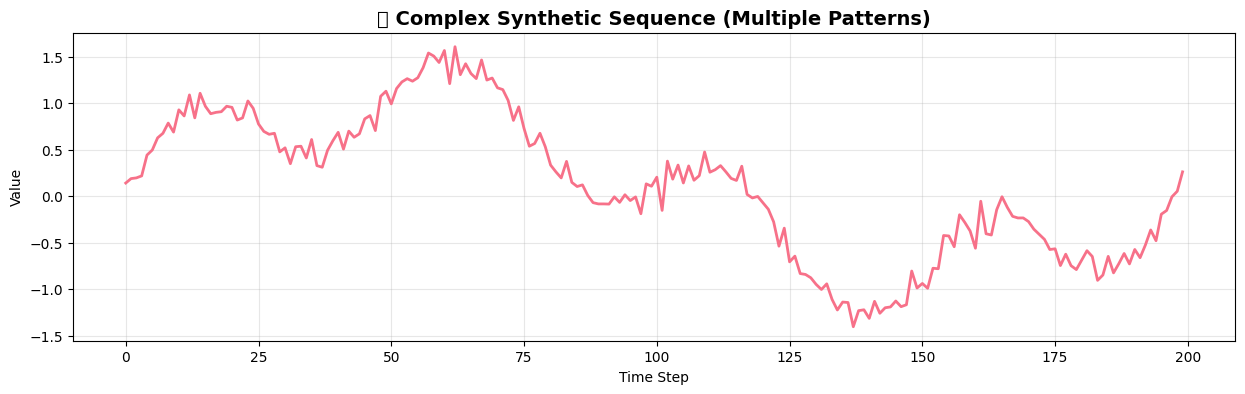

✅ CNN Data Preparation:
   Training shape: (784, 20, 1)
   Test shape: (196, 20, 1)

🏗️ BUILDING CNN MODEL
-----------------------
✅ CNN Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1d_1 (MaxPooling1D)      │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1d_2 (MaxPooling1D)      │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_maxpool                  │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,637 (37.64 KB)

 Trainable params: 9,637 (37.64 KB)

 Non-trainable params: 0 (0.00 B)


🚀 TRAINING CNN MODEL
----------------------
Training CNN for sequences...
Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.5639 - mae: 0.5925 - val_loss: 0.2410 - val_mae: 0.4155
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2567 - mae: 0.4068 - val_loss: 0.1943 - val_mae: 0.3707
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2147 - mae: 0.3858 - val_loss: 0.1675 - val_mae: 0.3401
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1774 - mae: 0.3459 - val_loss: 0.0981 - val_mae: 0.2559
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1419 - mae: 0.3037 - val_loss: 0.1135 - val_mae: 0.2781
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1259 - mae: 0.2857 - val_loss: 0.0842 - val_mae: 0.2349
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1284 - mae: 0.2897 - val_loss: 0.1000 - val_mae: 0.2606
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1128 - mae: 0.2670 - val_loss: 0.0971 - val_mae: 0.2

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1d (MaxPooling1D)        │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,029 (70.43 KB)

 Trainable params: 18,029 (70.43 KB)

 Non-trainable params: 0 (0.00 B)

Training Hybrid CNN-RNN...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8026 - mae: 0.6960 - val_loss: 0.3667 - val_mae: 0.4839
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2518 - mae: 0.3935 - val_loss: 0.2070 - val_mae: 0.3639
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2070 - mae: 0.3523 - val_loss: 0.1334 - val_mae: 0.2884
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1541 - mae: 0.2992 - val_loss: 0.1029 - val_mae: 0.2497
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1479 - mae: 0.2771 - val_loss: 0.0967 - val_mae: 0.2482
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1382 - mae: 0.2668 - val_loss: 0.0617 - val_mae: 0.1943
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1019 - mae: 0.2382 - val_loss: 0.0576 - val_mae: 0.1912
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1022 - mae: 0.2386 - val_loss: 0.0556 - val_mae: 0.1922
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 18, 32)    │        128 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 9, 32)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 7, 64)     │      6,208 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 50)        │     10,400 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 114)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │      5,750 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 50)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         51 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,537 (88.04 KB)

 Trainable params: 22,537 (88.04 KB)

 Non-trainable params: 0 (0.00 B)

Training Parallel CNN-RNN...
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3946 - mae: 0.4833 - val_loss: 0.0927 - val_mae: 0.2499
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0993 - mae: 0.2520 - val_loss: 0.0416 - val_mae: 0.1641
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0656 - mae: 0.2000 - val_loss: 0.0344 - val_mae: 0.1509
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0575 - mae: 0.1849 - val_loss: 0.0384 - val_mae: 0.1617
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0426 - mae: 0.1641 - val_loss: 0.0252 - val_mae: 0.1284
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 - mae: 0.1644 - val_loss: 0.0262 - val_mae: 0.1294
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 - mae: 0.1638 - val_loss: 0.0235 - val_mae: 0.1264
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0390 - mae: 0.1525 - val_loss: 0.0214 - val_mae: 0.1178
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

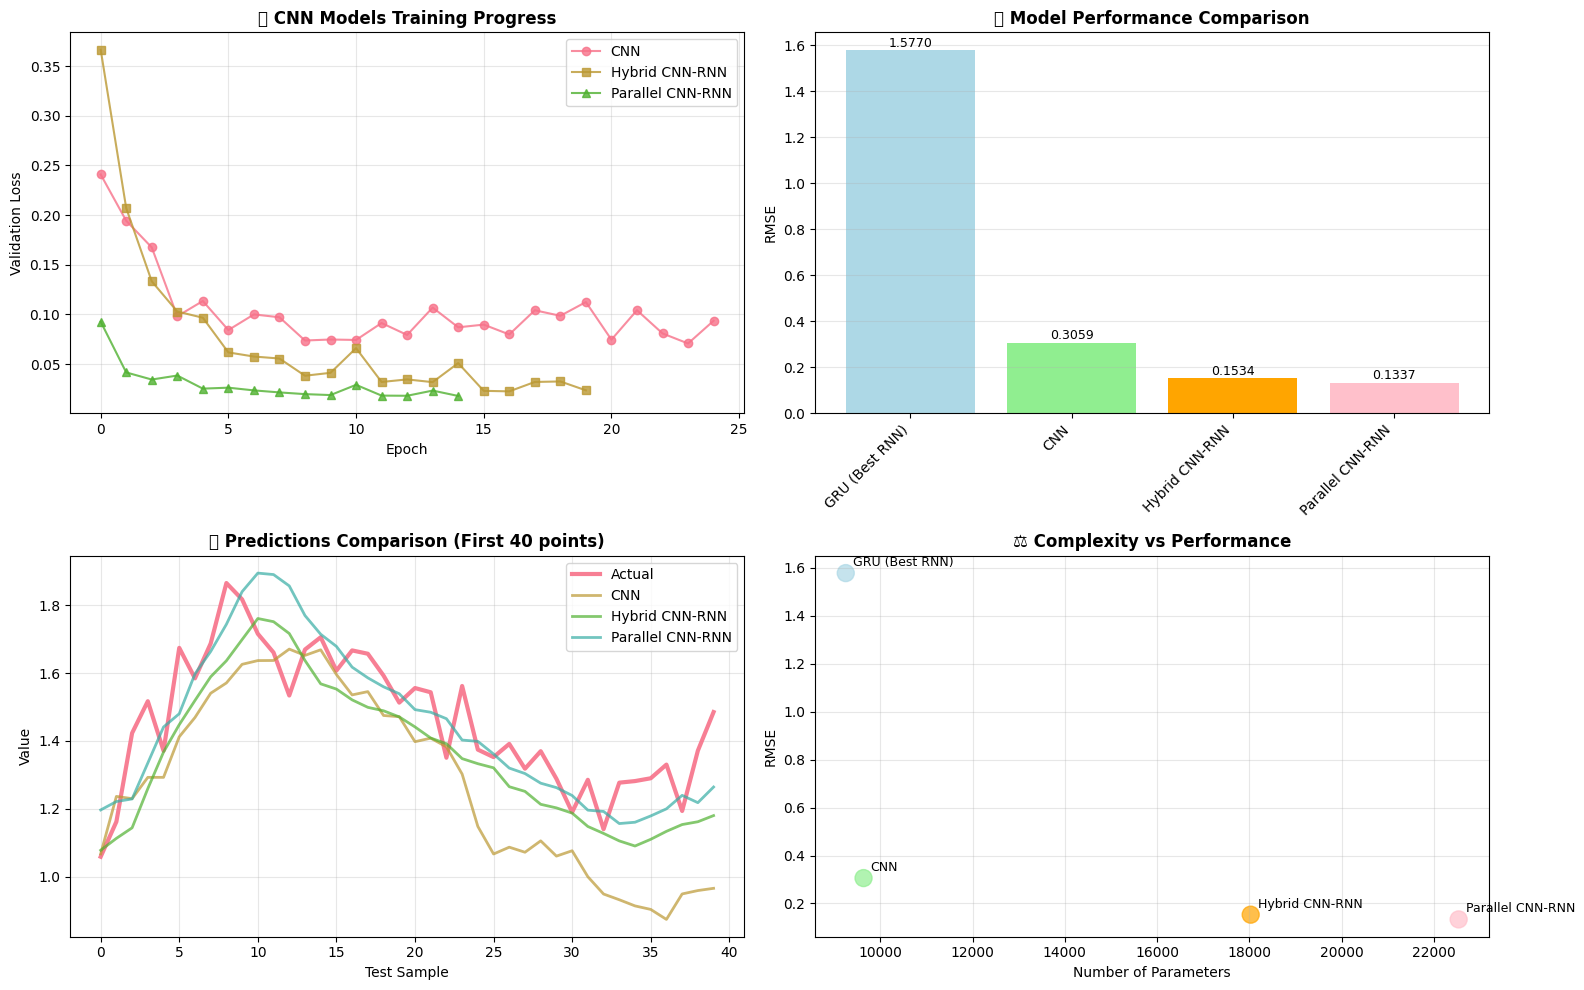


💡 CNN FOR SEQUENCES INSIGHTS:
--------------------------------
🔸 CNN can be very effective for sequence data with local patterns
🔸 Much faster training than RNNs due to parallel processing
🔸 Hybrid approaches can combine best of both worlds
🔸 CNN excels when patterns are more spatial than temporal
🔸 Global pooling helps handle variable sequence lengths

🎯 WHEN TO USE EACH APPROACH:
---------------------------------
🔸 Pure CNN: Fast processing, local patterns dominant
🔸 Hybrid CNN-RNN: CNN features + RNN sequential modeling
🔸 Parallel CNN-RNN: Combine different perspectives
🔸 Pure RNN: Long-term dependencies are crucial

⚡ PERFORMANCE SUMMARY:
------------------------
   GRU (Best RNN)    : RMSE=1.577031, Params=9,251
   CNN               : RMSE=0.305901, Params=9,637
   Hybrid CNN-RNN    : RMSE=0.153385, Params=18,029
   Parallel CNN-RNN  : RMSE=0.133677, Params=22,537

✅ CNN for sequences demonstration complete!


In [5]:
# 🔍 4.1 CNN untuk Sequences - Practical Implementation
print("🔍 CNN FOR SEQUENCES DEMONSTRATION")
print("=" * 50)

print("📊 PREPARING DATA FOR CNN")
print("-" * 26)

# For CNN, we need to pad sequences to make them fixed length
# Let's create a more complex synthetic dataset
def generate_complex_sequence(length=1000):
    """Generate more complex sequence data with multiple patterns"""
    t = np.linspace(0, 10, length)

    # Combine multiple patterns
    signal1 = np.sin(2 * np.pi * 0.5 * t)  # Slow oscillation
    signal2 = 0.5 * np.sin(2 * np.pi * 2 * t)  # Fast oscillation
    trend = 0.1 * t  # Linear trend
    noise = 0.1 * np.random.randn(length)

    combined = signal1 + signal2 + trend + noise
    return combined

# Generate complex sequence
print("Generating complex synthetic data...")
complex_sequence = generate_complex_sequence(1000)

# Visualize complex data
plt.figure(figsize=(15, 4))
plt.plot(complex_sequence[:200], linewidth=2)
plt.title('🔍 Complex Synthetic Sequence (Multiple Patterns)', fontsize=14, fontweight='bold')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

# Create sequences for CNN (same function as before)
X_complex, y_complex = create_sequences(complex_sequence, sequence_length)

# Train/test split
train_size_complex = int(0.8 * len(X_complex))
X_train_cnn = X_complex[:train_size_complex]
X_test_cnn = X_complex[train_size_complex:]
y_train_cnn = y_complex[:train_size_complex]
y_test_cnn = y_complex[train_size_complex:]

# Reshape for CNN (samples, timesteps, features)
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

print(f"✅ CNN Data Preparation:")
print(f"   Training shape: {X_train_cnn.shape}")
print(f"   Test shape: {X_test_cnn.shape}")

print(f"\n🏗️ BUILDING CNN MODEL")
print("-" * 23)

# Build CNN model for sequences
cnn_model = models.Sequential([
    # First convolutional block
    layers.Conv1D(filters=32, kernel_size=3, activation='relu',
                  input_shape=(sequence_length, 1), name='conv1d_1'),
    layers.MaxPooling1D(pool_size=2, name='maxpool1d_1'),

    # Second convolutional block
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', name='conv1d_2'),
    layers.MaxPooling1D(pool_size=2, name='maxpool1d_2'),

    # Global pooling to handle variable length
    layers.GlobalMaxPooling1D(name='global_maxpool'),

    # Dense layers
    layers.Dense(50, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, name='output')
])

print("✅ CNN Architecture:")
cnn_model.summary()

# Compile model
cnn_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print(f"\n🚀 TRAINING CNN MODEL")
print("-" * 22)

# Train CNN model
print("Training CNN for sequences...")
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    batch_size=32,
    epochs=25,
    validation_data=(X_test_cnn, y_test_cnn),
    verbose=1
)

# Evaluate CNN
cnn_loss, cnn_mae = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
cnn_pred = cnn_model.predict(X_test_cnn, verbose=0)
cnn_rmse = np.sqrt(mean_squared_error(y_test_cnn, cnn_pred))

print(f"\n📊 CNN RESULTS")
print("-" * 14)
print(f"🎯 CNN Test Results:")
print(f"   Loss (MSE): {cnn_loss:.6f}")
print(f"   RMSE: {cnn_rmse:.6f}")
print(f"   MAE: {cnn_mae:.6f}")

print(f"\n🤝 HYBRID CNN-RNN MODEL")
print("-" * 28)

# Build hybrid CNN-RNN model
hybrid_model = models.Sequential([
    # CNN part for local feature extraction
    layers.Conv1D(filters=32, kernel_size=3, activation='relu',
                  input_shape=(sequence_length, 1), name='conv1d'),
    layers.MaxPooling1D(pool_size=2, name='maxpool1d'),

    # RNN part for sequential dependencies
    layers.LSTM(50, return_sequences=False, name='lstm'),

    # Dense layers
    layers.Dense(25, activation='relu', name='dense1'),
    layers.Dropout(0.3, name='dropout'),
    layers.Dense(1, name='output')
])

print("✅ Hybrid CNN-RNN Architecture:")
hybrid_model.summary()

# Compile and train
hybrid_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training Hybrid CNN-RNN...")
hybrid_history = hybrid_model.fit(
    X_train_cnn, y_train_cnn,
    batch_size=32,
    epochs=20,
    validation_data=(X_test_cnn, y_test_cnn),
    verbose=1
)

# Evaluate hybrid model
hybrid_loss, hybrid_mae = hybrid_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
hybrid_pred = hybrid_model.predict(X_test_cnn, verbose=0)
hybrid_rmse = np.sqrt(mean_squared_error(y_test_cnn, hybrid_pred))

print(f"\n🤝 PARALLEL CNN-RNN MODEL")
print("-" * 29)

# Build parallel CNN-RNN model using Functional API
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(sequence_length, 1))

# CNN branch
cnn_branch = layers.Conv1D(32, 3, activation='relu')(input_layer)
cnn_branch = layers.MaxPooling1D(2)(cnn_branch)
cnn_branch = layers.Conv1D(64, 3, activation='relu')(cnn_branch)
cnn_branch = layers.GlobalMaxPooling1D()(cnn_branch)

# RNN branch
rnn_branch = layers.LSTM(50, return_sequences=False)(input_layer)

# Combine branches
combined = Concatenate()([cnn_branch, rnn_branch])
combined = layers.Dense(50, activation='relu')(combined)
combined = layers.Dropout(0.3)(combined)
output = layers.Dense(1)(combined)

# Create model
parallel_model = Model(inputs=input_layer, outputs=output)

print("✅ Parallel CNN-RNN Architecture:")
parallel_model.summary()

# Compile and train
parallel_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training Parallel CNN-RNN...")
parallel_history = parallel_model.fit(
    X_train_cnn, y_train_cnn,
    batch_size=32,
    epochs=15,
    validation_data=(X_test_cnn, y_test_cnn),
    verbose=1
)

# Evaluate parallel model
parallel_loss, parallel_mae = parallel_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
parallel_pred = parallel_model.predict(X_test_cnn, verbose=0)
parallel_rmse = np.sqrt(mean_squared_error(y_test_cnn, parallel_pred))

print(f"\n📊 COMPREHENSIVE CNN COMPARISON")
print("-" * 35)

# Add previous best RNN model for comparison (use GRU as it was efficient)
gru_pred_complex = gru_model.predict(X_test_cnn, verbose=0)
gru_rmse_complex = np.sqrt(mean_squared_error(y_test_cnn, gru_pred_complex))

# Compare all models including CNN approaches
cnn_comparison_data = {
    'Model': ['GRU (Best RNN)', 'CNN', 'Hybrid CNN-RNN', 'Parallel CNN-RNN'],
    'RMSE': [gru_rmse_complex, cnn_rmse, hybrid_rmse, parallel_rmse],
    'Parameters': [
        gru_model.count_params(),
        cnn_model.count_params(),
        hybrid_model.count_params(),
        parallel_model.count_params()
    ]
}

cnn_comparison_df = pd.DataFrame(cnn_comparison_data)
print(cnn_comparison_df.round(6))

# Find best CNN approach
best_cnn_idx = cnn_comparison_df['RMSE'].idxmin()
best_cnn = cnn_comparison_df.loc[best_cnn_idx, 'Model']
print(f"\n🏆 Best Model: {best_cnn}")

print(f"\n📈 CNN VISUALIZATION")
print("-" * 20)

# Create comprehensive CNN visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Training progress
axes[0, 0].plot(cnn_history.history['val_loss'], label='CNN', marker='o', alpha=0.8)
axes[0, 0].plot(hybrid_history.history['val_loss'], label='Hybrid CNN-RNN', marker='s', alpha=0.8)
axes[0, 0].plot(parallel_history.history['val_loss'], label='Parallel CNN-RNN', marker='^', alpha=0.8)
axes[0, 0].set_title('🚀 CNN Models Training Progress', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Performance comparison
model_names_cnn = cnn_comparison_df['Model']
rmse_values_cnn = cnn_comparison_df['RMSE']
bars = axes[0, 1].bar(range(len(model_names_cnn)), rmse_values_cnn,
                      color=['lightblue', 'lightgreen', 'orange', 'pink'])
axes[0, 1].set_title('📊 Model Performance Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticks(range(len(model_names_cnn)))
axes[0, 1].set_xticklabels(model_names_cnn, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, rmse_values_cnn):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                    f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Predictions comparison
test_range_cnn = range(40)  # First 40 points
axes[1, 0].plot(test_range_cnn, y_test_cnn[:40], label='Actual', linewidth=3, alpha=0.9)
axes[1, 0].plot(test_range_cnn, cnn_pred[:40], label='CNN', linewidth=2, alpha=0.7)
axes[1, 0].plot(test_range_cnn, hybrid_pred[:40], label='Hybrid CNN-RNN', linewidth=2, alpha=0.7)
axes[1, 0].plot(test_range_cnn, parallel_pred[:40], label='Parallel CNN-RNN', linewidth=2, alpha=0.7)
axes[1, 0].set_title('🔮 Predictions Comparison (First 40 points)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Test Sample')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Model complexity vs performance
param_counts_cnn = cnn_comparison_df['Parameters']
axes[1, 1].scatter(param_counts_cnn, rmse_values_cnn, s=150, alpha=0.7,
                   c=['lightblue', 'lightgreen', 'orange', 'pink'])
for i, model in enumerate(model_names_cnn):
    axes[1, 1].annotate(model, (param_counts_cnn[i], rmse_values_cnn[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 1].set_title('⚖️ Complexity vs Performance', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Parameters')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 CNN FOR SEQUENCES INSIGHTS:")
print("-" * 32)
print("🔸 CNN can be very effective for sequence data with local patterns")
print("🔸 Much faster training than RNNs due to parallel processing")
print("🔸 Hybrid approaches can combine best of both worlds")
print("🔸 CNN excels when patterns are more spatial than temporal")
print("🔸 Global pooling helps handle variable sequence lengths")

print(f"\n🎯 WHEN TO USE EACH APPROACH:")
print("-" * 33)
print("🔸 Pure CNN: Fast processing, local patterns dominant")
print("🔸 Hybrid CNN-RNN: CNN features + RNN sequential modeling")
print("🔸 Parallel CNN-RNN: Combine different perspectives")
print("🔸 Pure RNN: Long-term dependencies are crucial")

print(f"\n⚡ PERFORMANCE SUMMARY:")
print("-" * 24)
for i, model_name in enumerate(model_names_cnn):
    print(f"   {model_name:18}: RMSE={rmse_values_cnn[i]:.6f}, Params={param_counts_cnn[i]:,}")

print(f"\n✅ CNN for sequences demonstration complete!")
print("=" * 50)

---

# 📈 5. Time Series Forecasting

## 🎯 Apa itu Time Series Forecasting?

**Time Series Forecasting** adalah prediksi nilai future berdasarkan historical data yang **time-dependent**.

### 🏢 **Real-World Applications**:
- **📊 Financial** - Stock prices, cryptocurrency, forex
- **🌡️ Weather** - Temperature, rainfall, atmospheric pressure
- **⚡ Energy** - Power consumption, renewable energy generation
- **🛒 Retail** - Sales forecasting, inventory management
- **🚗 Transportation** - Traffic flow, demand prediction
- **🏥 Healthcare** - Patient admissions, disease spread

---

## 🔍 Types of Time Series Problems

### 📊 **1. Univariate Time Series**
- **Single variable** over time
- **Example**: Daily stock price of single company
- **Input**: [price(t-n), ..., price(t-1)] → **Output**: price(t)

### 📊 **2. Multivariate Time Series**  
- **Multiple variables** over time
- **Example**: Weather data (temperature, humidity, pressure)
- **Input**: [temp(t-n), humid(t-n), press(t-n), ..., temp(t-1), humid(t-1), press(t-1)]
- **Output**: temp(t), humid(t), press(t)

### 📊 **3. Multi-step Forecasting**
- **Predict multiple future values**
- **Example**: Next 7 days of stock prices
- **Input**: [price(t-n), ..., price(t-1)] → **Output**: [price(t), price(t+1), ..., price(t+6)]

---

## 🧠 Deep Learning Approaches

### 🔄 **RNN-based Approaches**:
- **Simple RNN** - Basic temporal patterns
- **LSTM** - Long-term dependencies in time series
- **GRU** - Efficient alternative to LSTM
- **Bidirectional** - When future context available (not for real-time)

### 🔍 **CNN-based Approaches**:
- **1D CNN** - Local temporal patterns
- **Dilated CNN** - Wider receptive fields
- **CNN-RNN Hybrid** - Local + global patterns

### 🚀 **Advanced Approaches**:
- **Attention Mechanisms** - Focus on relevant time steps
- **Transformer** - Self-attention for sequences
- **Prophet** - Facebook's time series forecasting tool
- **Neural ODE** - Continuous-time neural networks

---

## 📊 Key Challenges in Time Series

### ⚠️ **Data Challenges**:
- **Seasonality** - Recurring patterns (daily, weekly, yearly)
- **Trend** - Long-term direction of data
- **Noise** - Random fluctuations
- **Missing Values** - Gaps in temporal data
- **Outliers** - Extreme values that can skew predictions

### ⚠️ **Modeling Challenges**:
- **Non-stationarity** - Statistical properties change over time
- **Multiple Seasonalities** - Different recurring patterns
- **Concept Drift** - Underlying patterns change
- **Cold Start** - Limited historical data
- **Real-time Constraints** - Fast prediction requirements

---

## 🔧 Preprocessing Techniques

### 📏 **Normalization**:
```python
# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
```

### 📊 **Differencing** (Remove Trend):
```python
# First difference
diff_data = data.diff().dropna()

# Seasonal difference
seasonal_diff = data.diff(12).dropna()  # 12 for monthly data
```

### 🎯 **Feature Engineering**:
- **Lag Features** - Previous values as features
- **Rolling Statistics** - Moving averages, rolling std
- **Time Features** - Hour, day, month, year
- **Fourier Features** - Capture cyclical patterns

📈 TIME SERIES FORECASTING DEMONSTRATION
📊 CREATING REALISTIC TIME SERIES DATA
-------------------------------------
Generating realistic time series data...
✅ Generated time series with 1000 days of data


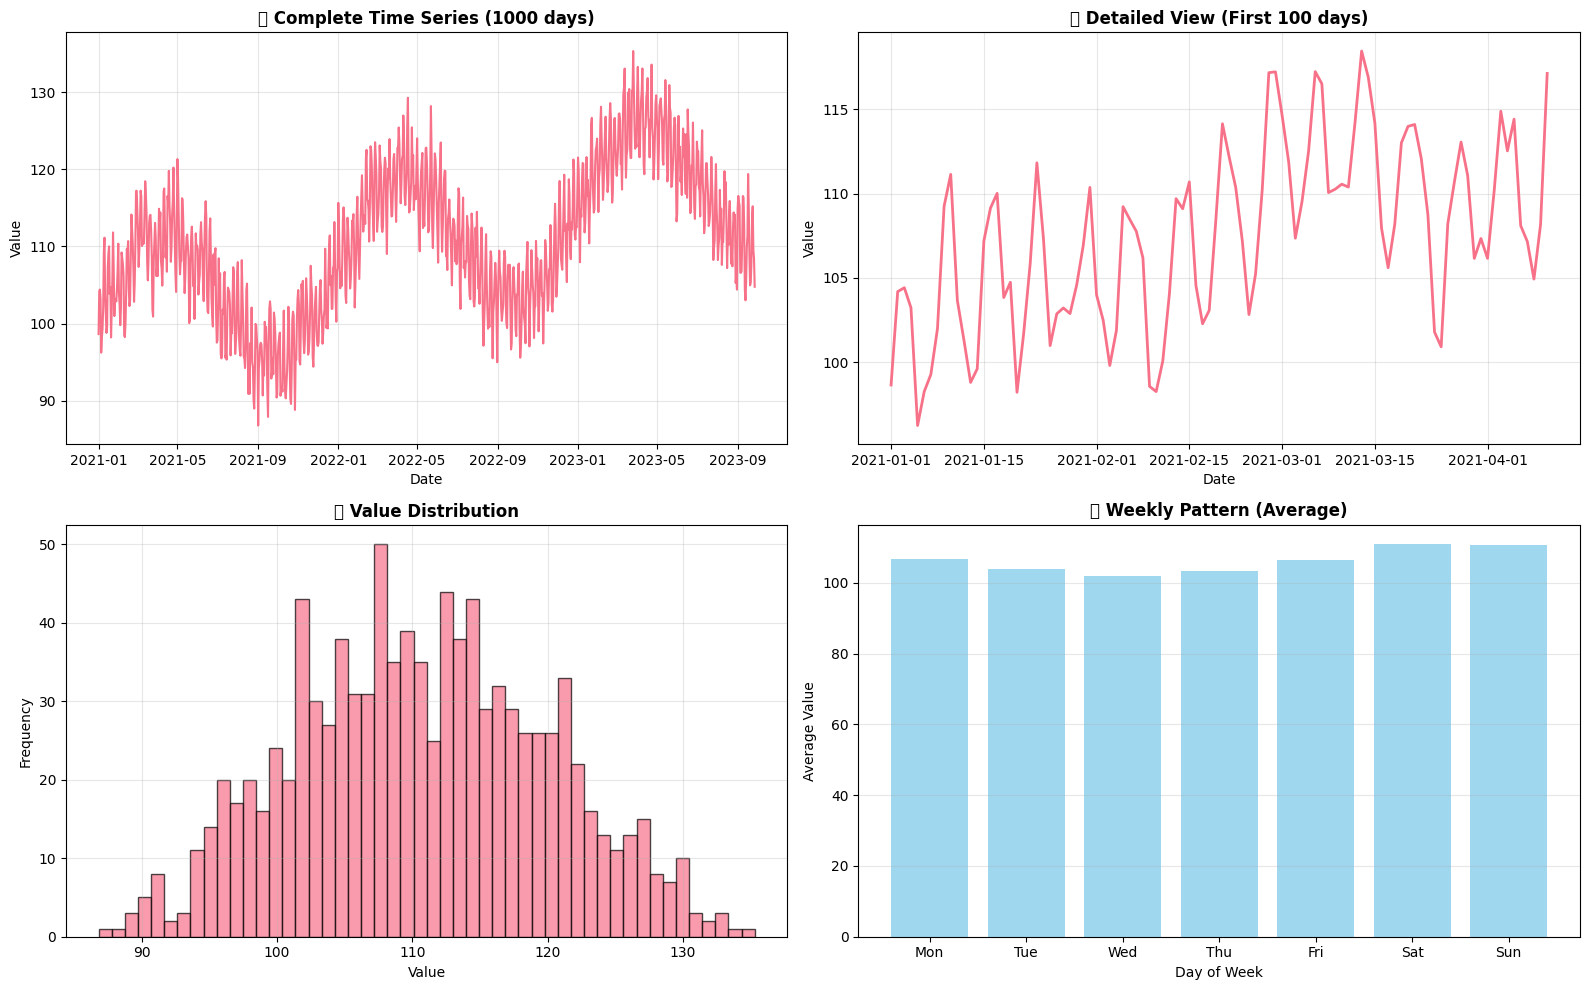


🔧 PREPROCESSING FOR FORECASTING
----------------------------------
✅ Data normalized to range [0.000, 1.000]
✅ Sequence creation:
   Sequence length: 30 days
   Forecast horizon: 1 day(s)
   Input shape: (970, 30)
   Target shape: (970,)
   Train: (582, 30, 1), Val: (194, 30, 1), Test: (194, 30, 1)

🏗️ BUILDING FORECASTING MODELS
--------------------------------
✅ Built 3 forecasting models:
   - LSTM Forecaster
   - GRU Forecaster
   - CNN-LSTM Forecaster

🚀 TRAINING FORECASTING MODELS
---------------------------------

Training LSTM Forecaster...
Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1413 - mae: 0.3221 - val_loss: 0.0117 - val_mae: 0.0861
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0205 - mae: 0.1137 - val_loss: 0.0103 - val_mae: 0.0815
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0153 - mae: 0.0998 - val_loss: 0.0106 - val_mae: 0.0824
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0131 - mae: 0.0943 - val_loss: 0

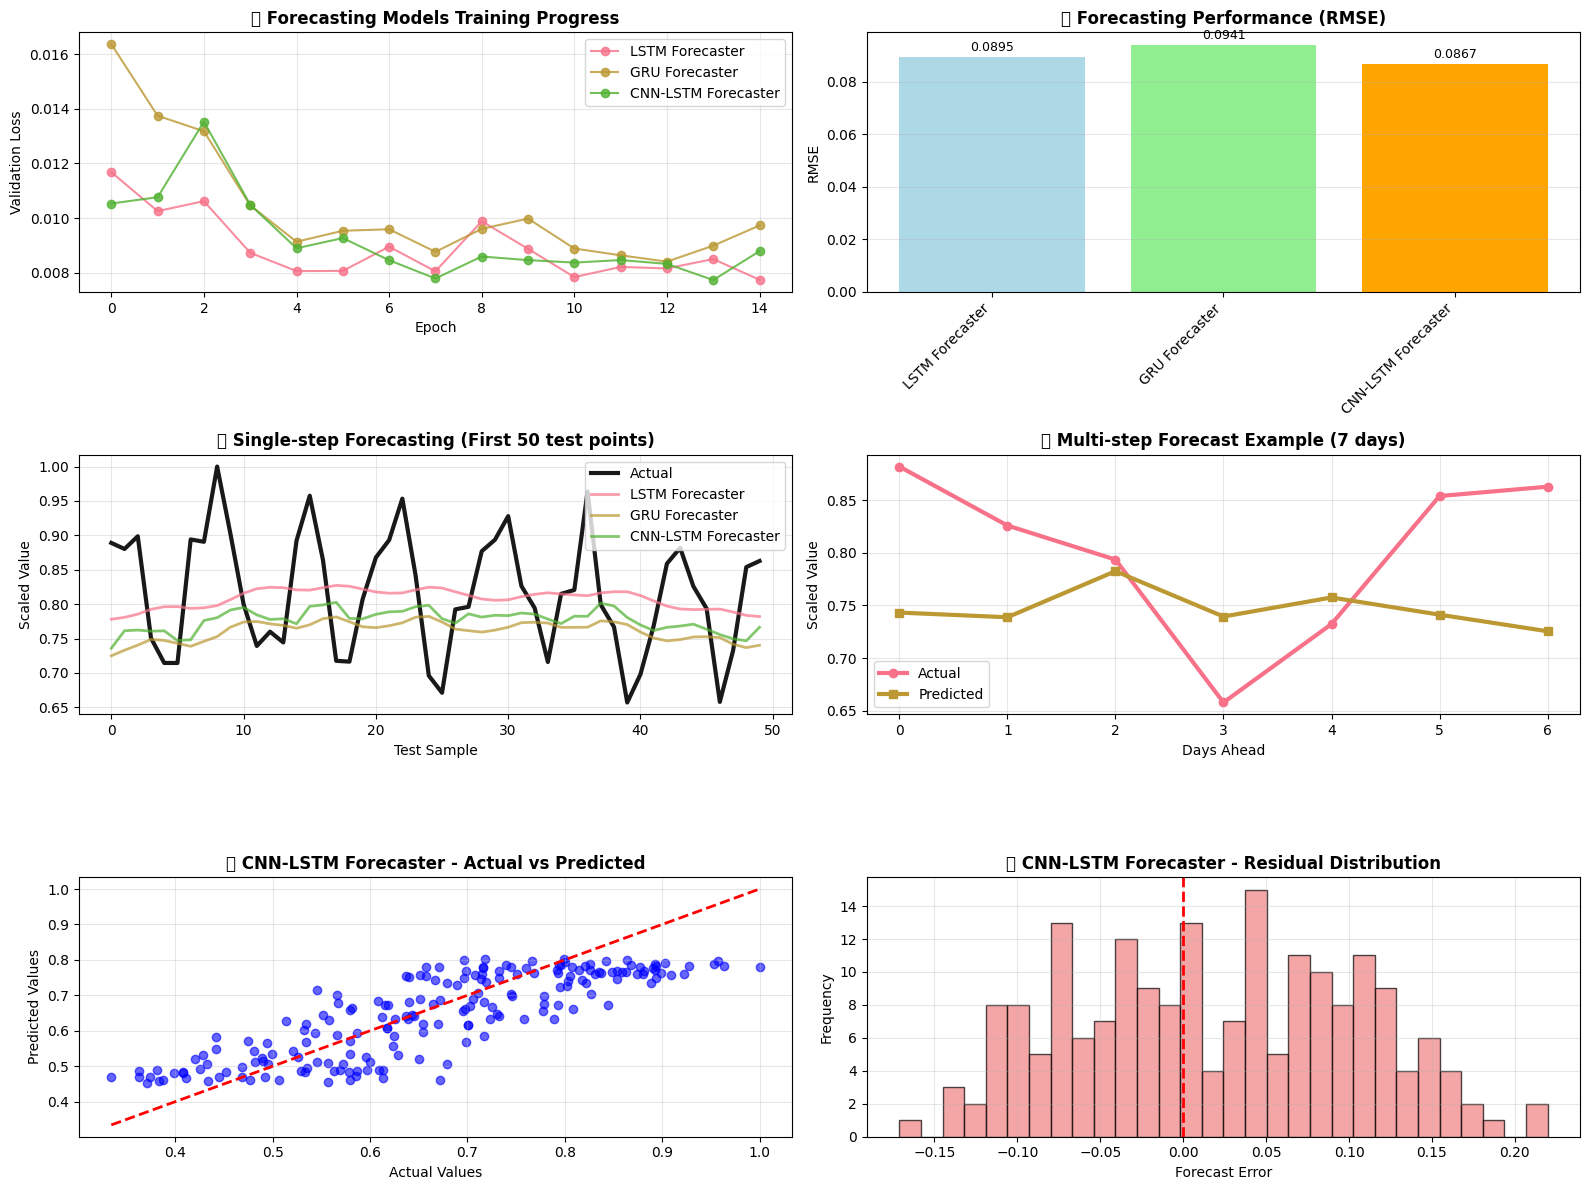


💡 TIME SERIES FORECASTING INSIGHTS:
--------------------------------------
🔸 LSTM and GRU are effective for time series with temporal dependencies
🔸 CNN-LSTM hybrid can capture both local and temporal patterns
🔸 Multi-step forecasting becomes more challenging with longer horizons
🔸 Data preprocessing (normalization) is crucial for good performance
🔸 Validation strategy should respect temporal order (no future leakage)

📊 FORECASTING PERFORMANCE SUMMARY:
------------------------------------
   LSTM Forecaster     : RMSE=0.089488, Params=29,857
   GRU Forecaster      : RMSE=0.094111, Params=22,817
   CNN-LSTM Forecaster : RMSE=0.086715, Params=17,561

✅ Time series forecasting demonstration complete!


In [6]:
# 📈 5.1 Time Series Forecasting - Practical Implementation
print("📈 TIME SERIES FORECASTING DEMONSTRATION")
print("=" * 50)

print("📊 CREATING REALISTIC TIME SERIES DATA")
print("-" * 37)

def create_realistic_timeseries(length=1000):
    """Create realistic time series with trend, seasonality, and noise"""
    t = np.arange(length)

    # Components
    trend = 0.02 * t  # Linear upward trend
    seasonal_yearly = 10 * np.sin(2 * np.pi * t / 365)  # Yearly seasonality
    seasonal_weekly = 5 * np.sin(2 * np.pi * t / 7)     # Weekly seasonality
    noise = 2 * np.random.randn(length)

    # Combine all components
    ts = 100 + trend + seasonal_yearly + seasonal_weekly + noise

    # Add some non-linear components
    ts += 3 * np.sin(2 * np.pi * t / 50) * np.exp(-t/500)  # Decaying oscillation

    return ts

# Generate realistic time series
print("Generating realistic time series data...")
ts_data = create_realistic_timeseries(1000)
dates = pd.date_range(start='2021-01-01', periods=len(ts_data), freq='D')
ts_df = pd.DataFrame({'date': dates, 'value': ts_data})

print(f"✅ Generated time series with {len(ts_data)} days of data")

# Visualize the time series
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Full time series
axes[0, 0].plot(ts_df['date'], ts_df['value'], linewidth=1.5)
axes[0, 0].set_title('📈 Complete Time Series (1000 days)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# First 100 days (detailed view)
axes[0, 1].plot(ts_df['date'][:100], ts_df['value'][:100], linewidth=2)
axes[0, 1].set_title('🔍 Detailed View (First 100 days)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)

# Distribution
axes[1, 0].hist(ts_df['value'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('📊 Value Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Weekly pattern (sample weeks)
sample_weeks = ts_df.iloc[:70]  # First 10 weeks
sample_weeks['day_of_week'] = sample_weeks['date'].dt.day_name()
weekly_avg = sample_weeks.groupby('day_of_week')['value'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = weekly_avg.reindex(day_order)

axes[1, 1].bar(range(7), weekly_avg.values, color='skyblue', alpha=0.8)
axes[1, 1].set_title('📅 Weekly Pattern (Average)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels([day[:3] for day in day_order])
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n🔧 PREPROCESSING FOR FORECASTING")
print("-" * 34)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(ts_df['value'].values.reshape(-1, 1)).flatten()

print(f"✅ Data normalized to range [{scaled_values.min():.3f}, {scaled_values.max():.3f}]")

# Create sequences for forecasting
def create_forecast_sequences(data, seq_length, forecast_horizon=1):
    """Create sequences for time series forecasting"""
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:(i + seq_length)])
        if forecast_horizon == 1:
            y.append(data[i + seq_length])
        else:
            y.append(data[i + seq_length:i + seq_length + forecast_horizon])
    return np.array(X), np.array(y)

# Parameters for forecasting
seq_length = 30  # Use 30 days to predict next day(s)
forecast_horizon = 1  # Predict 1 day ahead

# Create sequences
X_ts, y_ts = create_forecast_sequences(scaled_values, seq_length, forecast_horizon)

print(f"✅ Sequence creation:")
print(f"   Sequence length: {seq_length} days")
print(f"   Forecast horizon: {forecast_horizon} day(s)")
print(f"   Input shape: {X_ts.shape}")
print(f"   Target shape: {y_ts.shape}")

# Train/validation/test split (60/20/20)
n_samples = len(X_ts)
train_size = int(0.6 * n_samples)
val_size = int(0.2 * n_samples)

X_train_ts = X_ts[:train_size]
y_train_ts = y_ts[:train_size]
X_val_ts = X_ts[train_size:train_size + val_size]
y_val_ts = y_ts[train_size:train_size + val_size]
X_test_ts = X_ts[train_size + val_size:]
y_test_ts = y_ts[train_size + val_size:]

# Reshape for RNN
X_train_ts = X_train_ts.reshape((X_train_ts.shape[0], X_train_ts.shape[1], 1))
X_val_ts = X_val_ts.reshape((X_val_ts.shape[0], X_val_ts.shape[1], 1))
X_test_ts = X_test_ts.reshape((X_test_ts.shape[0], X_test_ts.shape[1], 1))

print(f"   Train: {X_train_ts.shape}, Val: {X_val_ts.shape}, Test: {X_test_ts.shape}")

print(f"\n🏗️ BUILDING FORECASTING MODELS")
print("-" * 32)

# 1. Simple LSTM Forecaster
lstm_forecaster = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    layers.Dropout(0.2),
    layers.LSTM(32, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
], name='LSTM_Forecaster')

# 2. GRU Forecaster
gru_forecaster = models.Sequential([
    layers.GRU(64, return_sequences=True, input_shape=(seq_length, 1)),
    layers.Dropout(0.2),
    layers.GRU(32, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
], name='GRU_Forecaster')

# 3. CNN-LSTM Hybrid Forecaster
cnn_lstm_forecaster = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(seq_length, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(50, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
], name='CNN_LSTM_Forecaster')

# Compile all models
models_ts = [lstm_forecaster, gru_forecaster, cnn_lstm_forecaster]
model_names_ts = ['LSTM Forecaster', 'GRU Forecaster', 'CNN-LSTM Forecaster']

for model in models_ts:
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("✅ Built 3 forecasting models:")
for name in model_names_ts:
    print(f"   - {name}")

print(f"\n🚀 TRAINING FORECASTING MODELS")
print("-" * 33)

# Train all models
histories_ts = []
predictions_ts = []
metrics_ts = []

for i, (model, name) in enumerate(zip(models_ts, model_names_ts)):
    print(f"\nTraining {name}...")

    # Train model
    history = model.fit(
        X_train_ts, y_train_ts,
        batch_size=32,
        epochs=15,
        validation_data=(X_val_ts, y_val_ts),
        verbose=1
    )
    histories_ts.append(history)

    # Evaluate and predict
    test_loss, test_mae = model.evaluate(X_test_ts, y_test_ts, verbose=0)
    predictions = model.predict(X_test_ts, verbose=0)
    predictions_ts.append(predictions.flatten())

    # Calculate additional metrics
    rmse = np.sqrt(mean_squared_error(y_test_ts, predictions))
    mae = mean_absolute_error(y_test_ts, predictions)

    metrics_ts.append({
        'Model': name,
        'MSE': test_loss,
        'RMSE': rmse,
        'MAE': mae,
        'Parameters': model.count_params()
    })

    print(f"   ✅ {name} - RMSE: {rmse:.6f}, MAE: {mae:.6f}")

print(f"\n📊 FORECASTING RESULTS COMPARISON")
print("-" * 37)

# Create comparison DataFrame
ts_results_df = pd.DataFrame(metrics_ts)
print(ts_results_df.round(6))

# Find best model
best_forecaster_idx = ts_results_df['RMSE'].idxmin()
best_forecaster = ts_results_df.loc[best_forecaster_idx, 'Model']
print(f"\n🏆 Best Forecaster: {best_forecaster}")

print(f"\n📈 MULTI-STEP FORECASTING")
print("-" * 28)

# Build multi-step forecaster (predict next 7 days)
multi_step_horizon = 7
X_multi, y_multi = create_forecast_sequences(scaled_values, seq_length, multi_step_horizon)

# Use only recent data for multi-step (to speed up training)
n_multi = min(500, len(X_multi))
X_multi = X_multi[-n_multi:]
y_multi = y_multi[-n_multi:]

train_size_multi = int(0.7 * len(X_multi))
X_train_multi = X_multi[:train_size_multi].reshape((train_size_multi, seq_length, 1))
y_train_multi = y_multi[:train_size_multi]
X_test_multi = X_multi[train_size_multi:].reshape((len(X_multi) - train_size_multi, seq_length, 1))
y_test_multi = y_multi[train_size_multi:]

# Multi-step forecaster model
multi_step_model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    layers.Dropout(0.2),
    layers.LSTM(32, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(multi_step_horizon)  # Output 7 values
], name='Multi_Step_Forecaster')

multi_step_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print(f"Training Multi-step Forecaster (predicting {multi_step_horizon} days ahead)...")
multi_history = multi_step_model.fit(
    X_train_multi, y_train_multi,
    batch_size=16,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate multi-step model
multi_pred = multi_step_model.predict(X_test_multi, verbose=0)
multi_rmse = np.sqrt(mean_squared_error(y_test_multi, multi_pred))
print(f"✅ Multi-step RMSE: {multi_rmse:.6f}")

print(f"\n📊 FORECASTING VISUALIZATION")
print("-" * 30)

# Create comprehensive forecasting visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Training progress
for i, (history, name) in enumerate(zip(histories_ts, model_names_ts)):
    axes[0, 0].plot(history.history['val_loss'], label=name, marker='o', alpha=0.8)
axes[0, 0].set_title('🚀 Forecasting Models Training Progress', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Performance comparison
bars = axes[0, 1].bar(range(len(model_names_ts)), ts_results_df['RMSE'], color=['lightblue', 'lightgreen', 'orange'])
axes[0, 1].set_title('📊 Forecasting Performance (RMSE)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticks(range(len(model_names_ts)))
axes[0, 1].set_xticklabels(model_names_ts, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, ts_results_df['RMSE']):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                    f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Single-step predictions comparison (first 50 test points)
test_range = range(50)
axes[1, 0].plot(test_range, y_test_ts[:50], label='Actual', linewidth=3, alpha=0.9, color='black')
for i, (pred, name) in enumerate(zip(predictions_ts, model_names_ts)):
    axes[1, 0].plot(test_range, pred[:50], label=name, linewidth=2, alpha=0.7)
axes[1, 0].set_title('🔮 Single-step Forecasting (First 50 test points)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Test Sample')
axes[1, 0].set_ylabel('Scaled Value')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Multi-step forecasting example
if len(multi_pred) > 0:
    sample_idx = 5  # Sample multi-step prediction
    days_range = range(multi_step_horizon)
    axes[1, 1].plot(days_range, y_test_multi[sample_idx], 'o-', label='Actual', linewidth=3, markersize=6)
    axes[1, 1].plot(days_range, multi_pred[sample_idx], 's-', label='Predicted', linewidth=3, markersize=6)
    axes[1, 1].set_title(f'📅 Multi-step Forecast Example ({multi_step_horizon} days)', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Days Ahead')
    axes[1, 1].set_ylabel('Scaled Value')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# 5. Forecast error analysis
best_predictions = predictions_ts[best_forecaster_idx]
forecast_errors = y_test_ts - best_predictions
axes[2, 0].scatter(y_test_ts, best_predictions, alpha=0.6, color='blue')
axes[2, 0].plot([y_test_ts.min(), y_test_ts.max()], [y_test_ts.min(), y_test_ts.max()], 'r--', linewidth=2)
axes[2, 0].set_title(f'🎯 {best_forecaster} - Actual vs Predicted', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Actual Values')
axes[2, 0].set_ylabel('Predicted Values')
axes[2, 0].grid(True, alpha=0.3)

# 6. Residual analysis
axes[2, 1].hist(forecast_errors, bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
axes[2, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2, 1].set_title(f'📊 {best_forecaster} - Residual Distribution', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Forecast Error')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 TIME SERIES FORECASTING INSIGHTS:")
print("-" * 38)
print("🔸 LSTM and GRU are effective for time series with temporal dependencies")
print("🔸 CNN-LSTM hybrid can capture both local and temporal patterns")
print("🔸 Multi-step forecasting becomes more challenging with longer horizons")
print("🔸 Data preprocessing (normalization) is crucial for good performance")
print("🔸 Validation strategy should respect temporal order (no future leakage)")

print(f"\n📊 FORECASTING PERFORMANCE SUMMARY:")
print("-" * 36)
for _, row in ts_results_df.iterrows():
    print(f"   {row['Model']:20}: RMSE={row['RMSE']:.6f}, Params={row['Parameters']:,}")

print(f"\n✅ Time series forecasting demonstration complete!")
print("=" * 50)

---

# 📝 6. Text Processing dengan RNN

## 🎯 Mengapa RNN untuk Text?

**Text** adalah sequential data alami yang sangat cocok untuk RNN processing:

### 📝 **Karakteristik Text sebagai Sequence**:
- **Word Order Matters** - "Dog bites man" ≠ "Man bites dog"
- **Variable Length** - Sentences have different lengths
- **Context Dependencies** - Meaning depends on surrounding words
- **Long-range Dependencies** - Pronouns refer to nouns mentioned earlier

### 🏢 **Text Processing Applications**:
- **📊 Sentiment Analysis** - Positive/negative/neutral classification
- **🏷️ Text Classification** - Topic categorization, spam detection
- **🔤 Named Entity Recognition** - Find persons, organizations, locations
- **🌐 Machine Translation** - Translate between languages
- **💬 Chatbots** - Conversational AI systems
- **📄 Text Summarization** - Automatic summary generation

---

## 🔧 Text Preprocessing Pipeline

### 1️⃣ **Tokenization**
```python
"Hello world!" → ["Hello", "world", "!"]
```

### 2️⃣ **Lowercasing**
```python
["Hello", "world", "!"] → ["hello", "world", "!"]
```

### 3️⃣ **Remove Punctuation/Stop Words**
```python
["hello", "world", "!"] → ["hello", "world"]
```

### 4️⃣ **Vocabulary Building**
```python
# Create word-to-index mapping
vocab = {"hello": 1, "world": 2, "<UNK>": 3, "<PAD>": 0}
```

### 5️⃣ **Sequence Conversion**
```python
["hello", "world"] → [1, 2]
```

### 6️⃣ **Padding**
```python
[1, 2] → [1, 2, 0, 0, 0]  # Pad to max_length
```

---

## 🎯 Text Classification Architecture

### 🏗️ **Basic RNN Text Classifier**:
```
Input: "This movie is great!"
    ↓
Tokenize: ["this", "movie", "is", "great"]
    ↓  
Embed: [[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]]
    ↓
RNN: Process sequence → final hidden state
    ↓
Dense: hidden_state → class probabilities
    ↓
Output: [0.1, 0.9] → "Positive"
```

### 📊 **Advanced Architectures**:
- **Bidirectional RNN** - Process text forwards and backwards
- **Attention Mechanism** - Focus on important words
- **Hierarchical RNN** - Word-level + sentence-level processing
- **CNN + RNN** - Local features + sequential processing

---

## 🎭 Sentiment Analysis Example

### 📊 **Problem Setup**:
- **Input**: Text review/comment
- **Output**: Sentiment (Positive/Negative/Neutral)
- **Challenge**: Sarcasm, negation, context

### 🔧 **Implementation Steps**:
1. **Data Collection** - Movie reviews, social media posts
2. **Preprocessing** - Clean, tokenize, pad sequences
3. **Embedding** - Convert words to dense vectors
4. **RNN Processing** - LSTM/GRU for sequence modeling
5. **Classification** - Dense layer with softmax
6. **Training** - Minimize cross-entropy loss

---

## 🌟 Advanced Techniques

### 🎯 **Word Embeddings**:
- **Word2Vec** - Skip-gram and CBOW
- **GloVe** - Global vectors for word representation
- **FastText** - Subword embeddings
- **Pre-trained** - Use embeddings trained on large corpora

### 🔍 **Attention Mechanisms**:
- **Self-Attention** - Words attend to other words in same sentence
- **Cross-Attention** - Words attend to words in different sequences
- **Multi-Head Attention** - Multiple attention mechanisms in parallel

### 🚀 **Transfer Learning**:
- **Pre-trained Models** - BERT, GPT, RoBERTa
- **Fine-tuning** - Adapt pre-trained models to specific tasks
- **Feature Extraction** - Use pre-trained embeddings as features

📝 TEXT PROCESSING WITH RNN DEMONSTRATION
📊 CREATING SYNTHETIC TEXT DATASET
-----------------------------------
✅ Created synthetic dataset:
   Positive reviews: 15
   Negative reviews: 15
   Total reviews: 30

📝 Sample Reviews:
   Positive: 'This movie is absolutely fantastic and amazing'
   Negative: 'This movie was terrible and completely boring'

🔧 TEXT PREPROCESSING
---------------------
✅ Preprocessing steps applied:
   - Convert to lowercase
   - Remove punctuation
   - Tokenize into words
✅ Vocabulary built:
   Vocabulary size: 108
   Most common words: ['and', 'this', 'of', 'the', 'i', 'movie', 'a', 'film', 'acting', 'was']
✅ Sequence conversion:
   Max sequence length: 15
   Input shape: (30, 15)
   Label shape: (30,)

📝 Example conversion:
   Original: 'This movie is absolutely fantastic and amazing'
   Processed: ['this', 'movie', 'is', 'absolutely', 'fantastic', 'and', 'amazing']
   Sequence: [ 3  7 40 12 41  2 42  0  0  0  0  0  0  0  0]
   Label: 1 (Positive)

🔀 TRAIN/TES

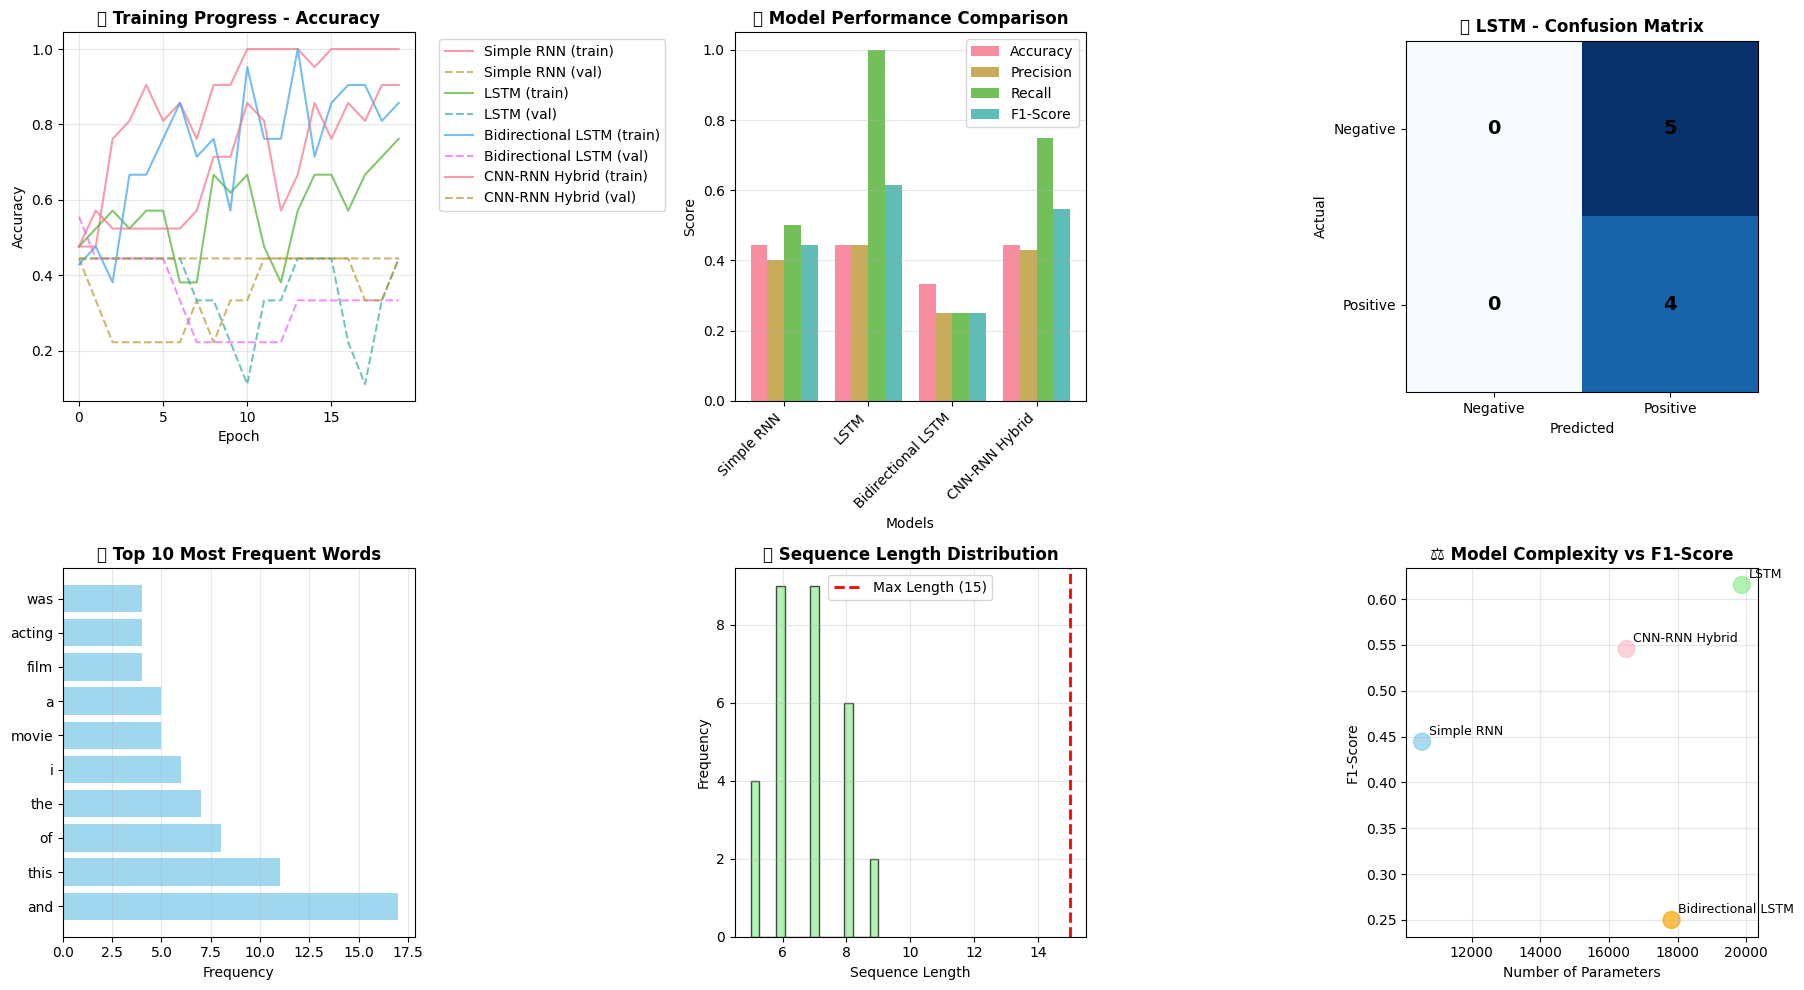


💡 TEXT PROCESSING INSIGHTS:
------------------------------
🔸 Embedding layer converts words to dense vector representations
🔸 RNNs can capture sequential dependencies in text effectively
🔸 Bidirectional RNNs provide richer context by processing both directions
🔸 CNN-RNN hybrids can capture local patterns and sequential dependencies
🔸 Proper preprocessing is crucial for good text classification performance

🎯 TEXT CLASSIFICATION BEST PRACTICES:
----------------------------------------
🔸 Use pre-trained embeddings (Word2Vec, GloVe) for better performance
🔸 Handle class imbalance with proper sampling or weighted loss
🔸 Apply regularization (dropout) to prevent overfitting
🔸 Consider attention mechanisms for longer texts
🔸 Experiment with different sequence lengths and vocabulary sizes

📊 FINAL PERFORMANCE SUMMARY:
-------------------------------
   Simple RNN          : F1=0.4444, Acc=0.4444, Params=10,561
   LSTM                : F1=0.6154, Acc=0.4444, Params=19,873
   Bidirectional LST

In [7]:
# 📝 6.1 Text Processing - Sentiment Analysis with RNN
print("📝 TEXT PROCESSING WITH RNN DEMONSTRATION")
print("=" * 50)

print("📊 CREATING SYNTHETIC TEXT DATASET")
print("-" * 35)

# Create synthetic movie reviews dataset for demonstration
positive_reviews = [
    "This movie is absolutely fantastic and amazing",
    "I loved every moment of this incredible film",
    "Outstanding performance by the actors",
    "A masterpiece of cinema that everyone should watch",
    "Brilliant storytelling and excellent direction",
    "One of the best movies I have ever seen",
    "Exceptional cinematography and wonderful music",
    "This film exceeded all my expectations completely",
    "A truly remarkable and inspiring story",
    "Perfect blend of drama and entertainment",
    "Absolutely loved the characters and plot",
    "This movie made me laugh and cry with joy",
    "An unforgettable cinematic experience for sure",
    "The acting was superb and very convincing",
    "I would definitely recommend this to everyone"
]

negative_reviews = [
    "This movie was terrible and completely boring",
    "I hated every single minute of this film",
    "Poor acting and terrible direction throughout",
    "One of the worst movies ever made",
    "Awful storyline and bad character development",
    "This film was a complete waste of time",
    "Horrible cinematography and annoying music",
    "This movie disappointed me in every way",
    "A truly awful and depressing story",
    "Terrible blend of bad acting and poor writing",
    "I absolutely hated the characters and plot",
    "This movie made me want to leave early",
    "A forgettable and painful experience overall",
    "The acting was horrible and unconvincing",
    "I would never recommend this to anyone"
]

# Combine datasets
reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)  # 1=positive, 0=negative

print(f"✅ Created synthetic dataset:")
print(f"   Positive reviews: {len(positive_reviews)}")
print(f"   Negative reviews: {len(negative_reviews)}")
print(f"   Total reviews: {len(reviews)}")

# Show sample reviews
print(f"\n📝 Sample Reviews:")
print(f"   Positive: '{positive_reviews[0]}'")
print(f"   Negative: '{negative_reviews[0]}'")

print(f"\n🔧 TEXT PREPROCESSING")
print("-" * 21)

import re
from collections import Counter

def preprocess_text(text):
    """Basic text preprocessing"""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and keep only alphanumeric and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Split into tokens
    tokens = text.split()
    return tokens

# Preprocess all reviews
processed_reviews = [preprocess_text(review) for review in reviews]

print("✅ Preprocessing steps applied:")
print("   - Convert to lowercase")
print("   - Remove punctuation")
print("   - Tokenize into words")

# Build vocabulary
all_words = []
for review in processed_reviews:
    all_words.extend(review)

word_counts = Counter(all_words)
vocab_size = min(1000, len(word_counts))  # Limit vocab size
most_common_words = word_counts.most_common(vocab_size - 2)  # Reserve 2 for special tokens

# Create word-to-index mapping
word_to_idx = {'<PAD>': 0, '<UNK>': 1}
for word, _ in most_common_words:
    word_to_idx[word] = len(word_to_idx)

idx_to_word = {idx: word for word, idx in word_to_idx.items()}

print(f"✅ Vocabulary built:")
print(f"   Vocabulary size: {len(word_to_idx)}")
print(f"   Most common words: {list(word_to_idx.keys())[2:12]}")

def texts_to_sequences(texts, word_to_idx, max_length=20):
    """Convert texts to sequences of indices"""
    sequences = []
    for text in texts:
        sequence = []
        for word in text:
            if word in word_to_idx:
                sequence.append(word_to_idx[word])
            else:
                sequence.append(word_to_idx['<UNK>'])
        # Pad or truncate to max_length
        if len(sequence) < max_length:
            sequence.extend([word_to_idx['<PAD>']] * (max_length - len(sequence)))
        else:
            sequence = sequence[:max_length]
        sequences.append(sequence)
    return np.array(sequences)

# Convert to sequences
max_length = 15  # Maximum sequence length
X_text = texts_to_sequences(processed_reviews, word_to_idx, max_length)
y_text = np.array(labels)

print(f"✅ Sequence conversion:")
print(f"   Max sequence length: {max_length}")
print(f"   Input shape: {X_text.shape}")
print(f"   Label shape: {y_text.shape}")

# Show example conversion
sample_idx = 0
print(f"\n📝 Example conversion:")
print(f"   Original: '{reviews[sample_idx]}'")
print(f"   Processed: {processed_reviews[sample_idx]}")
print(f"   Sequence: {X_text[sample_idx]}")
print(f"   Label: {y_text[sample_idx]} ({'Positive' if y_text[sample_idx] == 1 else 'Negative'})")

print(f"\n🔀 TRAIN/TEST SPLIT")
print("-" * 20)

# Shuffle and split the data
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.3, random_state=42, stratify=y_text
)

print(f"✅ Data split:")
print(f"   Training samples: {len(X_train_text)}")
print(f"   Test samples: {len(X_test_text)}")
print(f"   Train positive ratio: {y_train_text.mean():.2f}")
print(f"   Test positive ratio: {y_test_text.mean():.2f}")

print(f"\n🏗️ BUILDING TEXT CLASSIFICATION MODELS")
print("-" * 40)

# 1. Simple RNN Text Classifier
simple_rnn_text = models.Sequential([
    layers.Embedding(len(word_to_idx), 64, input_length=max_length, name='embedding'),
    layers.SimpleRNN(32, return_sequences=False, name='simple_rnn'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')  # Binary classification
], name='Simple_RNN_Text')

# 2. LSTM Text Classifier
lstm_text = models.Sequential([
    layers.Embedding(len(word_to_idx), 64, input_length=max_length, name='embedding'),
    layers.LSTM(32, return_sequences=False, name='lstm'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='LSTM_Text')

# 3. Bidirectional LSTM Text Classifier
bi_lstm_text = models.Sequential([
    layers.Embedding(len(word_to_idx), 64, input_length=max_length, name='embedding'),
    layers.Bidirectional(layers.LSTM(16, return_sequences=False), name='bidirectional_lstm'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='Bidirectional_LSTM_Text')

# 4. CNN-RNN Hybrid for Text
cnn_rnn_text = models.Sequential([
    layers.Embedding(len(word_to_idx), 64, input_length=max_length, name='embedding'),
    layers.Conv1D(32, 3, activation='relu', name='conv1d'),
    layers.MaxPooling1D(2, name='maxpool1d'),
    layers.LSTM(16, return_sequences=False, name='lstm'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='CNN_RNN_Text')

# Compile all text models
text_models = [simple_rnn_text, lstm_text, bi_lstm_text, cnn_rnn_text]
text_model_names = ['Simple RNN', 'LSTM', 'Bidirectional LSTM', 'CNN-RNN Hybrid']

for model in text_models:
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

print("✅ Built 4 text classification models:")
for name in text_model_names:
    print(f"   - {name}")

print(f"\n🚀 TRAINING TEXT CLASSIFICATION MODELS")
print("-" * 39)

# Train all text models
text_histories = []
text_predictions = []
text_metrics = []

for i, (model, name) in enumerate(zip(text_models, text_model_names)):
    print(f"\nTraining {name}...")

    # Train model
    history = model.fit(
        X_train_text, y_train_text,
        batch_size=8,  # Small batch size for small dataset
        epochs=20,
        validation_data=(X_test_text, y_test_text),
        verbose=1
    )
    text_histories.append(history)

    # Evaluate and predict
    test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test_text, y_test_text, verbose=0)
    predictions = model.predict(X_test_text, verbose=0)
    binary_predictions = (predictions > 0.5).astype(int).flatten()
    text_predictions.append(binary_predictions)

    # Calculate F1 score
    from sklearn.metrics import f1_score, classification_report
    f1 = f1_score(y_test_text, binary_predictions)

    text_metrics.append({
        'Model': name,
        'Accuracy': test_acc,
        'Precision': test_prec,
        'Recall': test_rec,
        'F1-Score': f1,
        'Parameters': model.count_params()
    })

    print(f"   ✅ {name} - Accuracy: {test_acc:.4f}, F1: {f1:.4f}")

print(f"\n📊 TEXT CLASSIFICATION RESULTS")
print("-" * 33)

# Create comparison DataFrame
text_results_df = pd.DataFrame(text_metrics)
print(text_results_df.round(4))

# Find best model
best_text_idx = text_results_df['F1-Score'].idxmax()
best_text_model = text_results_df.loc[best_text_idx, 'Model']
print(f"\n🏆 Best Text Classifier: {best_text_model}")

print(f"\n🎯 PREDICTION EXAMPLES")
print("-" * 22)

# Test with some examples
test_examples = [
    "This movie is absolutely amazing and wonderful",
    "I hated this terrible and boring film",
    "The acting was okay but not great",
    "One of the best movies ever made"
]

print("Testing on new examples:")
best_model = text_models[best_text_idx]

for example in test_examples:
    # Preprocess the example
    processed = preprocess_text(example)
    sequence = texts_to_sequences([processed], word_to_idx, max_length)

    # Make prediction
    pred_prob = best_model.predict(sequence, verbose=0)[0][0]
    sentiment = "Positive" if pred_prob > 0.5 else "Negative"
    confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

    print(f"   Text: '{example}'")
    print(f"   Prediction: {sentiment} (confidence: {confidence:.3f})")
    print()

print(f"\n📈 TEXT PROCESSING VISUALIZATION")
print("-" * 35)

# Create text processing visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Training accuracy
for i, (history, name) in enumerate(zip(text_histories, text_model_names)):
    axes[0, 0].plot(history.history['accuracy'], label=f'{name} (train)', alpha=0.7)
    axes[0, 0].plot(history.history['val_accuracy'], label=f'{name} (val)', alpha=0.7, linestyle='--')
axes[0, 0].set_title('🚀 Training Progress - Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# 2. Model performance comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(text_model_names))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    values = text_results_df[metric].values
    axes[0, 1].bar(x_pos + i * width, values, width, label=metric, alpha=0.8)

axes[0, 1].set_title('📊 Model Performance Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticks(x_pos + width * 1.5)
axes[0, 1].set_xticklabels(text_model_names, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Confusion matrix for best model
from sklearn.metrics import confusion_matrix
best_predictions = text_predictions[best_text_idx]
cm = confusion_matrix(y_test_text, best_predictions)

im = axes[0, 2].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 2].set_title(f'🎯 {best_text_model} - Confusion Matrix', fontsize=12, fontweight='bold')
tick_marks = np.arange(2)
axes[0, 2].set_xticks(tick_marks)
axes[0, 2].set_yticks(tick_marks)
axes[0, 2].set_xticklabels(['Negative', 'Positive'])
axes[0, 2].set_yticklabels(['Negative', 'Positive'])
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

# Add text annotations
for i in range(2):
    for j in range(2):
        axes[0, 2].text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=14, fontweight='bold')

# 4. Word frequency
word_freq = Counter(word for review in processed_reviews for word in review)
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

axes[1, 0].barh(range(len(words)), counts, color='skyblue', alpha=0.8)
axes[1, 0].set_title('📝 Top 10 Most Frequent Words', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_yticks(range(len(words)))
axes[1, 0].set_yticklabels(words)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 5. Sequence length distribution
seq_lengths = [len([w for w in review if w != '<PAD>']) for review in processed_reviews]
axes[1, 1].hist(seq_lengths, bins=15, alpha=0.7, edgecolor='black', color='lightgreen')
axes[1, 1].axvline(x=max_length, color='red', linestyle='--', linewidth=2, label=f'Max Length ({max_length})')
axes[1, 1].set_title('📏 Sequence Length Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sequence Length')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Model complexity vs performance
param_counts_text = text_results_df['Parameters']
f1_scores = text_results_df['F1-Score']
axes[1, 2].scatter(param_counts_text, f1_scores, s=150, alpha=0.7,
                   c=['skyblue', 'lightgreen', 'orange', 'pink'])
for i, model in enumerate(text_model_names):
    axes[1, 2].annotate(model, (param_counts_text[i], f1_scores[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 2].set_title('⚖️ Model Complexity vs F1-Score', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Number of Parameters')
axes[1, 2].set_ylabel('F1-Score')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 TEXT PROCESSING INSIGHTS:")
print("-" * 30)
print("🔸 Embedding layer converts words to dense vector representations")
print("🔸 RNNs can capture sequential dependencies in text effectively")
print("🔸 Bidirectional RNNs provide richer context by processing both directions")
print("🔸 CNN-RNN hybrids can capture local patterns and sequential dependencies")
print("🔸 Proper preprocessing is crucial for good text classification performance")

print(f"\n🎯 TEXT CLASSIFICATION BEST PRACTICES:")
print("-" * 40)
print("🔸 Use pre-trained embeddings (Word2Vec, GloVe) for better performance")
print("🔸 Handle class imbalance with proper sampling or weighted loss")
print("🔸 Apply regularization (dropout) to prevent overfitting")
print("🔸 Consider attention mechanisms for longer texts")
print("🔸 Experiment with different sequence lengths and vocabulary sizes")

print(f"\n📊 FINAL PERFORMANCE SUMMARY:")
print("-" * 31)
for _, row in text_results_df.iterrows():
    print(f"   {row['Model']:20}: F1={row['F1-Score']:.4f}, Acc={row['Accuracy']:.4f}, Params={row['Parameters']:,}")

print(f"\n✅ Text processing demonstration complete!")
print("=" * 50)

---

# 💡 7. Best Practices & Advanced Tips

## 🎯 Model Selection Guidelines

### 🔄 **When to Use Each Architecture**:

#### **Simple RNN** 🔄
- ✅ **Use When**: Basic temporal patterns, fast prototyping, limited computational resources
- ❌ **Avoid When**: Long sequences (>20-30 steps), complex dependencies
- 🎯 **Best For**: Simple time series, basic text classification, educational purposes

#### **LSTM** 🧠💾  
- ✅ **Use When**: Long-term dependencies, complex patterns, large datasets
- ❌ **Avoid When**: Computational constraints, simple patterns
- 🎯 **Best For**: Language modeling, machine translation, complex time series

#### **GRU** 🚪
- ✅ **Use When**: Good balance of performance and efficiency needed
- ❌ **Avoid When**: Maximum performance is critical regardless of cost
- 🎯 **Best For**: Most sequence tasks, resource-constrained environments

#### **CNN for Sequences** 🔍
- ✅ **Use When**: Local patterns are important, parallel processing needed
- ❌ **Avoid When**: Long-term dependencies are crucial
- 🎯 **Best For**: Text classification, audio processing, fast inference

#### **Hybrid CNN-RNN** 🤝
- ✅ **Use When**: Both local and global patterns are important
- ❌ **Avoid When**: Simplicity is preferred, limited training time
- 🎯 **Best For**: Complex sequence tasks, maximum performance

---

## ⚡ Performance Optimization

### 🚀 **Training Speed Optimization**:

#### **Data Loading**:
```python
# Use tf.data for efficient data pipeline
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)
```

#### **Mixed Precision Training**:
```python
# Enable mixed precision for faster training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)
```

#### **GPU Optimization**:
```python
# Use CuDNN optimized layers
layers.LSTM(units, implementation=2)  # CuDNN optimized
layers.GRU(units, implementation=2)   # CuDNN optimized
```

### 🎯 **Memory Optimization**:

#### **Gradient Checkpointing**:
```python
# Trade computation for memory
@tf.recompute_grad
def lstm_layer(inputs):
    return layers.LSTM(units)(inputs)
```

#### **Sequence Bucketing**:
```python
# Group sequences by similar length
def bucket_sequences(sequences, bucket_boundaries):
    # Group sequences into buckets to minimize padding
    pass
```

---

## 🔧 Hyperparameter Tuning

### 📊 **Key Hyperparameters**:

#### **Architecture Parameters**:
- **Hidden Units**: Start with 32-128, increase if underfitting
- **Number of Layers**: 1-3 layers, more layers for complex tasks
- **Dropout Rate**: 0.1-0.5, higher for overfitting prevention

#### **Training Parameters**:
- **Learning Rate**: 0.001 (Adam default), adjust based on convergence
- **Batch Size**: 32-128, larger for stable gradients
- **Sequence Length**: Balance between context and computational cost

#### **Regularization**:
- **Dropout**: Apply after RNN layers and before final dense layer
- **Recurrent Dropout**: Dropout on recurrent connections
- **L1/L2 Regularization**: For weight penalty

### 🎯 **Hyperparameter Search Strategies**:

#### **Grid Search**:
```python
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1]
}
```

#### **Random Search**:
```python
# More efficient than grid search
from sklearn.model_selection import RandomizedSearchCV
```

#### **Bayesian Optimization**:
```python
# Use libraries like Optuna or Hyperopt
import optuna
```

---

## 🛡️ Common Problems & Solutions

### ⚠️ **Vanishing Gradients**:
- **Problem**: Gradients become very small in long sequences
- **Solutions**:
  - Use LSTM/GRU instead of Simple RNN
  - Gradient clipping: `clipnorm=1.0`
  - Residual connections
  - Better initialization

### ⚠️ **Exploding Gradients**:
- **Problem**: Gradients become extremely large
- **Solutions**:
  - Gradient clipping: `clipnorm=1.0` or `clipvalue=0.5`
  - Lower learning rate
  - Better weight initialization

### ⚠️ **Overfitting**:
- **Problem**: Model memorizes training data
- **Solutions**:
  - Dropout regularization
  - Early stopping
  - Data augmentation
  - Reduce model complexity

### ⚠️ **Slow Convergence**:
- **Problem**: Training takes too long or doesn't converge
- **Solutions**:
  - Learning rate scheduling
  - Better optimization (Adam, RMSprop)
  - Batch normalization
  - Skip connections

---

## 📊 Data Preprocessing Best Practices

### 🔧 **Sequence Data**:

#### **Normalization**:
```python
# For time series
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# For text embeddings
embeddings = tf.nn.l2_normalize(embeddings, axis=-1)
```

#### **Handling Variable Lengths**:
```python
# Padding strategy
sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=max_length, padding='post', truncating='post'
)

# Masking for padded sequences
model.add(layers.Masking(mask_value=0.0))
```

#### **Data Augmentation**:
```python
# For text: synonym replacement, back-translation
# For sequences: noise injection, time warping
def add_noise(sequence, noise_factor=0.01):
    return sequence + noise_factor * np.random.randn(*sequence.shape)
```

### 📈 **Feature Engineering**:

#### **Time Series Features**:
```python
# Lag features
df['lag_1'] = df['value'].shift(1)
df['lag_7'] = df['value'].shift(7)

# Rolling statistics
df['rolling_mean'] = df['value'].rolling(window=7).mean()
df['rolling_std'] = df['value'].rolling(window=7).std()

# Time features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
```

#### **Text Features**:
```python
# N-gram features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))

# TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
```

---

## 🎯 Evaluation & Monitoring

### 📊 **Evaluation Metrics**:

#### **Regression Tasks**:
- **MAE**: Mean Absolute Error
- **RMSE**: Root Mean Square Error
- **MAPE**: Mean Absolute Percentage Error

#### **Classification Tasks**:
- **Accuracy**: Overall correctness
- **Precision/Recall**: For imbalanced datasets
- **F1-Score**: Harmonic mean of precision and recall
- **AUC-ROC**: Area under ROC curve

#### **Sequence Tasks**:
- **BLEU**: For translation tasks
- **Perplexity**: For language modeling
- **Edit Distance**: For sequence alignment

### 📈 **Monitoring During Training**:

#### **Learning Curves**:
```python
# Plot training vs validation metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
```

#### **Early Stopping**:
```python
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
```

#### **Learning Rate Scheduling**:
```python
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5
)
```

---

## 🚀 Advanced Techniques

### 🎯 **Attention Mechanisms**:
```python
# Self-attention layer
attention = layers.MultiHeadAttention(
    num_heads=8, key_dim=64
)
```

### 🔄 **Transfer Learning**:
```python
# Use pre-trained embeddings
embedding_layer = layers.Embedding(
    vocab_size, embed_dim,
    weights=[pretrained_embeddings],
    trainable=False
)
```

### 🤝 **Ensemble Methods**:
```python
# Combine multiple models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return np.mean(predictions, axis=0)
```

### 📊 **Multi-task Learning**:
```python
# Shared encoder, multiple task-specific heads
shared_encoder = layers.LSTM(64, return_sequences=True)
task1_head = layers.Dense(num_classes1, activation='softmax')
task2_head = layers.Dense(num_classes2, activation='softmax')
```

---

# 🎯 8. Chapter Summary & Conclusion

## 📋 Apa yang Telah Kita Pelajari

### 🧠 **Konsep Fundamental**:
- ✅ **Sequential Data Processing** - Memahami pentingnya urutan dalam data
- ✅ **RNN Architecture** - Simple RNN, LSTM, GRU dan karakteristiknya
- ✅ **CNN for Sequences** - Penggunaan CNN untuk data sekuensial
- ✅ **Hybrid Approaches** - Menggabungkan CNN dan RNN untuk performa optimal

### 🔄 **RNN Family Comparison**:

| Model | Complexity | Speed | Memory | Long-term Deps | Use Case |
|-------|------------|-------|--------|----------------|----------|
| **Simple RNN** | Low | Fast | Low | Poor | Basic patterns |
| **LSTM** | High | Slow | High | Excellent | Complex sequences |
| **GRU** | Medium | Medium | Medium | Good | Balanced approach |
| **Bidirectional** | 2x base | Slower | 2x base | Better | Full context |
| **Stacked** | High | Slow | High | Best | Very complex |

### 🎯 **Aplikasi Praktis yang Dipelajari**:
- 📈 **Time Series Forecasting** - Prediksi data temporal
- 📝 **Sentiment Analysis** - Klasifikasi teks dengan RNN
- 🔍 **Pattern Recognition** - Deteksi pola dalam sequences
- 🤝 **Hybrid Modeling** - Kombinasi CNN-RNN untuk performa optimal

---

## 🏆 Key Takeaways

### 💡 **Architecture Selection**:
1. **Simple RNN** 🔄 - Good for learning concepts, poor for real applications
2. **LSTM** 🧠💾 - Gold standard for complex sequential modeling
3. **GRU** 🚪 - Best balance of performance and efficiency
4. **CNN** 🔍 - Excellent for local patterns and parallel processing
5. **Hybrid** 🤝 - Combines strengths of different architectures

### 🎯 **Performance Insights**:
- **LSTM** generally outperforms Simple RNN on complex tasks
- **GRU** provides similar performance to LSTM with fewer parameters
- **CNN** can be surprisingly effective for sequence data
- **Hybrid models** often achieve best performance but with added complexity
- **Bidirectional** processing improves context understanding

### 🔧 **Implementation Best Practices**:
1. **Data Preprocessing** - Proper normalization and sequence preparation
2. **Regularization** - Dropout and early stopping to prevent overfitting
3. **Hyperparameter Tuning** - Systematic approach to finding optimal settings
4. **Evaluation Strategy** - Proper train/validation/test splits for sequences
5. **Computational Efficiency** - Balance between model complexity and resources

---

## 🚀 Advanced Topics untuk Eksplorasi Lebih Lanjut

### 🌟 **Attention Mechanisms**:
- **Self-Attention** - Transformer architecture foundation
- **Multi-Head Attention** - Parallel attention computation
- **Cross-Attention** - Attention between different sequences

### 🧠 **Modern Architectures**:
- **Transformer** - State-of-the-art untuk banyak sequence tasks
- **BERT/GPT** - Pre-trained language models
- **Vision Transformer** - Transformer untuk computer vision

### 📊 **Specialized Applications**:
- **Neural Machine Translation** - Sequence-to-sequence models
- **Speech Recognition** - Audio sequence processing
- **Video Analysis** - Spatio-temporal sequence modeling
- **Graph Neural Networks** - Sequences on graph structures

---

## 🔗 Useful Resources & References

### 📚 **Essential Papers**:
- **LSTM**: Hochreiter & Schmidhuber (1997) - "Long Short-Term Memory"
- **GRU**: Cho et al. (2014) - "Learning Phrase Representations using RNN"
- **Attention**: Bahdanau et al. (2014) - "Neural Machine Translation by Jointly Learning to Align and Translate"
- **Transformer**: Vaswani et al. (2017) - "Attention Is All You Need"

### 🛠️ **Tools & Libraries**:
- **TensorFlow/Keras** - Deep learning framework yang kita gunakan
- **PyTorch** - Alternative framework dengan dynamic graphs
- **Hugging Face** - Pre-trained models dan tokenizers
- **spaCy** - Advanced NLP preprocessing

### 🌐 **Online Resources**:
- **TensorFlow Tutorials** - Official sequence modeling guides
- **Papers with Code** - Latest research dengan implementasi
- **Towards Data Science** - Practical tutorials dan case studies
- **fast.ai** - Practical deep learning courses

---

## 🎯 Practical Next Steps

### 📈 **Project Ideas untuk Practice**:

#### **Beginner Level**:
1. **Stock Price Prediction** - Simple time series forecasting
2. **Movie Review Classification** - Basic sentiment analysis
3. **Temperature Forecasting** - Weather data prediction

#### **Intermediate Level**:
1. **Multi-variate Time Series** - Multiple features forecasting
2. **Named Entity Recognition** - Sequence labeling task
3. **Anomaly Detection** - Unusual pattern detection in sequences

#### **Advanced Level**:
1. **Neural Machine Translation** - Sequence-to-sequence modeling
2. **Chatbot Development** - Conversational AI
3. **Music Generation** - Creative sequence generation

### 🔧 **Skills untuk Dikembangkan**:
1. **Data Engineering** - Efficient data pipelines untuk sequences
2. **Model Deployment** - Real-time sequence processing systems
3. **Distributed Training** - Training large models pada multiple GPUs
4. **MLOps** - Production ML systems untuk sequence models

---

## 🌟 Final Thoughts

### 💭 **Key Messages**:

1. **Sequences are Everywhere** 📊
   - Dari text sampai time series, dari audio sampai video
   - Understanding sequence processing opens many opportunities

2. **No One-Size-Fits-All** 🎯
   - Different problems require different approaches
   - Always consider trade-offs: performance vs complexity vs resources

3. **Practice Makes Perfect** 🚀
   - Theoretical knowledge needs practical implementation
   - Start dengan simple projects, gradually increase complexity

4. **Stay Updated** 📚
   - Field berkembang sangat cepat
   - Follow latest research dan best practices

5. **Think Beyond Accuracy** ⚖️
   - Consider interpretability, fairness, dan robustness
   - Real-world deployment has many considerations

### 🎉 **Congratulations!**

Anda telah menyelesaikan comprehensive journey melalui **RNN dan CNN untuk sequence processing**!

Dari **Simple RNN** yang basic hingga **hybrid architectures** yang sophisticated, dari **time series forecasting** hingga **sentiment analysis**, Anda sekarang memiliki solid foundation untuk tackling berbagai sequence modeling problems.

**Remember**: The best way to master these techniques adalah dengan **practice, experiment, dan iterate**. Start building your own projects, explore different datasets, dan jangan takut untuk try novel approaches!

---

## 🏁 Chapter 15 Complete!

**Selamat!** Anda telah berhasil menguasai:
- 🔄 **RNN Fundamentals** - Simple RNN, LSTM, GRU
- 🔍 **CNN for Sequences** - Alternative approach untuk sequence data  
- 📈 **Time Series Forecasting** - Practical prediction techniques
- 📝 **Text Processing** - NLP dengan RNN
- 💡 **Best Practices** - Production-ready implementations
- 🤝 **Hybrid Approaches** - Combining different architectures

**Next Steps**: Apply this knowledge to real-world projects dan explore advanced topics seperti Transformers dan Attention mechanisms!

🚀 **Happy Deep Learning!** 🚀